# DOTA dataset

Import and clean the DOTA data set:

This script pulls in images and labeled.txt files, cleanes them for the model used in this project, and saves the cleaned images and labels in `datasets/obj_detection/dota/`

The DOTA data set can be found here: http://captain.whu.edu.cn/DOTAweb/ 

In [1]:
%cd ..

/Users/bdhammel/Documents/insight/harvesting


In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt
from pipeline.raw_data import clean_dota
from pipeline import obj_pipeline
from pipeline import utils as pipe_utils
import glob
import os
import csv

dataset_dir = os.path.join(os.getcwd(), 'datasets')
cleaned_image_dir = os.path.join(dataset_dir, 'obj_detection/dota/images')
cleaned_label_dir = os.path.join(dataset_dir, 'obj_detection/dota/')

Denote where the DOTA data is. Save the directory for all the labels and images

In [3]:
dota_image_dir1 = '/Users/bdhammel/Documents/insight/data/dota/images'
dota_image_dir2 = '/Users/bdhammel/Documents/insight/data/dota/images-2'
dota_image_dir3 = '/Users/bdhammel/Documents/insight/data/dota/images-3'
dota_label_dir = '/Users/bdhammel/Documents/insight/data/dota/labelTxt'

Import and clean the dota images. If you don't want to import the entire dataset, set `max_imgs`.

In [4]:
def import_dota():
    max_imgs = 1400
    dota_image_dirs = [dota_image_dir1, dota_image_dir2, dota_image_dir3]
    loader = clean_dota.dota_loader(dota_label_dir)
    processor = clean_dota.dota_processor(block_shape=(400,400,3))
    
    choice = 'y'
    
    if os.path.exists(cleaned_label_dir):
        print("Warning, this directory already exists. Running the rest of this script my contaminate the data already there.")
        choice = input("Continue? y/n: ")

    errors = []
    for i, label_file in enumerate(glob.glob(dota_label_dir+'/*.txt')):
        if i > max_imgs or choice.lower() != 'y':
            break
        else:
            img_name = pipe_utils.get_file_name_from_path(label_file)
            img_path = clean_dota.fetch_image_path(img_name, dota_image_dirs)
            raw_img = loader(img_path)
            try:
                ds = processor(raw_img)
            except Exception as e:
                errors.append(e)
            else:
                # Clean the data and save as train and test sets
                clean_dota.save_as_retinanet_data(
                    ds, 
                    cleaned_image_dir, 
                    cleaned_label_dir, 
                    percent_test_set=.2, 
                    include_labels=clean_dota.LABELS_TO_INCLUDE
                )
    
    return errors


## Uncomment this line if you actaully want to perform the data importing
errors = import_dota()

loading image  P0766
Image P0766.png loaded
	Shape:  (906, 939, 3)
	dtype:  uint8
Values: (0.00,234.00)
Cleaned To:
	Shape:  (906, 939, 3)
	dtype:  uint8
...done
Creating directory to save processed images
loading image  P0000
Image P0000.png loaded
	Shape:  (5502, 3875, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (5502, 3875, 3)
	dtype:  uint8
...done
loading image  P1336
Image P1336.png loaded
	Shape:  (4000, 5200)
	dtype:  uint8
Values: (4.00,255.00)
Cleaned To:
	Shape:  (4000, 5200)
	dtype:  uint8
...done
loading image  P2159
Image P2159.png loaded
	Shape:  (1088, 1780, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1088, 1780, 3)
	dtype:  uint8
...done
loading image  P1450
Image P1450.png loaded
	Shape:  (3931, 2610, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (3931, 2610, 3)
	dtype:  uint8
...done
loading image  P1444
Image P1444.png loaded
	Shape:  (4089, 2489, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4089, 24

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1108__5_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1108__4_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1108__5_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P2401
Image P2401.png loaded
	Shape:  (2197, 1557, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2197, 1557, 3)
	dtype:  uint8
...done
loading image  P2415
Image P2415.png loaded
	Shape:  (2492, 2046, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2492, 2046, 3)
	dtype:  uint8
...done
loading image  P0202
Image P0202.png loaded
	Shape:  (1198, 1169, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1198, 1169, 3)
	dtype:  uint8
...done
loading image  P2373
Image P2373.png loaded
	Shape:  (2431, 2220, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2431, 2220, 3)
	dtype:  uint8
...done
loading image  P1652
Image P1652.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (16.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P1646
Image P1646.png loaded
	Shape:  (4000, 4295)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4000, 4295)
	dtype:  uint8
...done
loading image  

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0438__2_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1726
Image P1726.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (15.00,195.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P1054
Image P1054.png loaded
	Shape:  (1043, 408, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1043, 408, 3)
	dtype:  uint8
...done
loading image  P1915
Image P1915.png loaded
	Shape:  (1810, 644, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1810, 644, 3)
	dtype:  uint8
...done
loading image  P0389
Image P0389.png loaded
	Shape:  (1138, 831, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1138, 831, 3)
	dtype:  uint8
...done
loading image  P1929
Image P1929.png loaded
	Shape:  (2214, 1333, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2214, 1333, 3)
	dtype:  uint8
...done
loading image  P2777
Image P2777.png loaded
	Shape:  (2535, 4344, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2535, 4344, 3)
	dtype:  uint8
...done
loading image  

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2005__0_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2005__1_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2005__10_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2005__11_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/ski

loading image  P0612
Image P0612.png loaded
	Shape:  (933, 1203, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (933, 1203, 3)
	dtype:  uint8
...done
loading image  P0174
Image P0174.png loaded
	Shape:  (1348, 1948, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1348, 1948, 3)
	dtype:  uint8
...done
loading image  P1524
Image P1524.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (6.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P2039
Image P2039.png loaded
	Shape:  (852, 720, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (852, 720, 3)
	dtype:  uint8
...done
loading image  P1256
Image P1256.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (3.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P0809
Image P0809.png loaded
	Shape:  (1115, 1404, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1115, 1404, 3)
	dtype:  uint8
...done
loading image  P2788
I

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0835__0_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0835__1_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0835__2_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0835__3_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1295
Image P1295.png loaded
	Shape:  (4000, 5200)
	dtype:  uint8
Values: (12.00,255.00)
Cleaned To:
	Shape:  (4000, 5200)
	dtype:  uint8
...done
loading image  P2038
Image P2038.png loaded
	Shape:  (648, 976, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (648, 976, 3)
	dtype:  uint8
...done
loading image  P1531
Image P1531.png loaded
	Shape:  (4000, 4293)
	dtype:  uint8
Values: (5.00,255.00)
Cleaned To:
	Shape:  (4000, 4293)
	dtype:  uint8
...done
loading image  P0149
Image P0149.png loaded
	Shape:  (868, 698, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (868, 698, 3)
	dtype:  uint8
...done
loading image  P1243
Image P1243.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (31.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P2004
Image P2004.png loaded
	Shape:  (1785, 1187, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1785, 1187, 3)
	dtype:  uint8
...done
loading image  P2010
Image P

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1096__0_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P0388
Image P0388.png loaded
	Shape:  (1100, 591, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1100, 591, 3)
	dtype:  uint8
...done
loading image  P1928
Image P1928.png loaded
	Shape:  (594, 673, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (594, 673, 3)
	dtype:  uint8
...done
loading image  P1900
Image P1900.png loaded
	Shape:  (802, 696, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (802, 696, 3)
	dtype:  uint8
...done
loading image  P1055
Image P1055.png loaded
	Shape:  (4442, 4856, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (4442, 4856, 3)
	dtype:  uint8
...done
loading image  P1727
Image P1727.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (0.00,195.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P0439
Image P0439.png loaded
	Shape:  (829, 891, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (829, 891, 3)
	dtype:  uint8
...done
loading image  P2548
Ima

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1069__2_6.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1069__9_7.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P2560
Image P2560.png loaded
	Shape:  (3566, 3702, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (3566, 3702, 3)
	dtype:  uint8
...done
loading image  P2206
Image P2206.png loaded
	Shape:  (1620, 1224, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1620, 1224, 3)
	dtype:  uint8
...done
loading image  P0405
Image P0405.png loaded
	Shape:  (1334, 623, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1334, 623, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0405__0_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P0363
Image P0363.png loaded
	Shape:  (1141, 832, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1141, 832, 3)
	dtype:  uint8
...done
loading image  P1848
Image P1848.png loaded
	Shape:  (2213, 1580, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2213, 1580, 3)
	dtype:  uint8
...done
loading image  P1874
Image P1874.png loaded
	Shape:  (3384, 3546, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (3384, 3546, 3)
	dtype:  uint8
...done
loading image  P2428
Image P2428.png loaded
	Shape:  (2611, 2564, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2611, 2564, 3)
	dtype:  uint8
...done
loading image  P1121
Image P1121.png loaded
	Shape:  (1280, 2304, 3)
	dtype:  uint8
Values: (44.00,255.00)
Cleaned To:
	Shape:  (1280, 2304, 3)
	dtype:  uint8
...done
loading image  P1653
Image P1653.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (16.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading im

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0029__5_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1337
Image P1337.png loaded
	Shape:  (4000, 5200)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4000, 5200)
	dtype:  uint8
...done
loading image  P1451
Image P1451.png loaded
	Shape:  (4046, 2199, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4046, 2199, 3)
	dtype:  uint8
...done
loading image  P2158
Image P2158.png loaded
	Shape:  (1765, 1492, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1765, 1492, 3)
	dtype:  uint8
...done
loading image  P1479
Image P1479.png loaded
	Shape:  (2066, 2404, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2066, 2404, 3)
	dtype:  uint8
...done
loading image  P2616
Image P2616.png loaded
	Shape:  (1094, 1911, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1094, 1911, 3)
	dtype:  uint8
...done
loading image  P0001
Image P0001.png loaded
	Shape:  (5774, 1252, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (5774, 1252, 3)
	dtype:  uint8
...done
loading im

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2164__10_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2164__9_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2164__10_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2164__10_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P2614
Image P2614.png loaded
	Shape:  (1361, 1571, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1361, 1571, 3)
	dtype:  uint8
...done
loading image  P2600
Image P2600.png loaded
	Shape:  (2380, 1973, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2380, 1973, 3)
	dtype:  uint8
...done
loading image  P1309
Image P1309.png loaded
	Shape:  (3620, 4000)
	dtype:  uint8
Values: (3.00,255.00)
Cleaned To:
	Shape:  (3620, 4000)
	dtype:  uint8
...done
loading image  P2628
Image P2628.png loaded
	Shape:  (1576, 1247, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1576, 1247, 3)
	dtype:  uint8
...done
loading image  P1321
Image P1321.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (6.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P0759
Image P0759.png loaded
	Shape:  (1085, 1139, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1085, 1139, 3)
	dtype:  uint8
...done
loading image  P

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0981__3_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1453
Image P1453.png loaded
	Shape:  (1742, 2322, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1742, 2322, 3)
	dtype:  uint8
...done
loading image  P0995
Image P0995.png loaded
	Shape:  (1823, 611, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1823, 611, 3)
	dtype:  uint8
...done
loading image  P1484
Image P1484.png loaded
	Shape:  (2171, 1962, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2171, 1962, 3)
	dtype:  uint8
...done
loading image  P2199
Image P2199.png loaded
	Shape:  (1367, 1231, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1367, 1231, 3)
	dtype:  uint8
...done
loading image  P0567
Image P0567.png loaded
	Shape:  (854, 889, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (854, 889, 3)
	dtype:  uint8
...done
loading image  P2370
Image P2370.png loaded
	Shape:  (1703, 1616, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1703, 1616, 3)
	dtype:  uint8
...done
loading im

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1057__3_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1057__4_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1057__3_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1057__4_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

loading image  P0349
Image P0349.png loaded
	Shape:  (3569, 3272, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (3569, 3272, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0349__3_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1043
Image P1043.png loaded
	Shape:  (1361, 1142, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1361, 1142, 3)
	dtype:  uint8
...done
loading image  P1725
Image P1725.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (0.00,195.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P1902
Image P1902.png loaded
	Shape:  (811, 951, 3)
	dtype:  uint8
Values: (1.00,246.00)
Cleaned To:
	Shape:  (811, 951, 3)
	dtype:  uint8
...done
loading image  P1094
Image P1094.png loaded
	Shape:  (4382, 1207, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (4382, 1207, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1094__0_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1094__1_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1094__1_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1094__1_4.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

loading image  P1080
Image P1080.png loaded
	Shape:  (3151, 1673, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (3151, 1673, 3)
	dtype:  uint8
...done
loading image  P2006
Image P2006.png loaded
	Shape:  (2611, 1992, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2611, 1992, 3)
	dtype:  uint8
...done
loading image  P0611
Image P0611.png loaded
	Shape:  (1613, 837, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1613, 837, 3)
	dtype:  uint8
...done
loading image  P0605
Image P0605.png loaded
	Shape:  (1085, 635, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1085, 635, 3)
	dtype:  uint8
...done
loading image  P0163
Image P0163.png loaded
	Shape:  (650, 986, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (650, 986, 3)
	dtype:  uint8
...done
loading image  P1255
Image P1255.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (32.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P1

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2761__4_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2761__5_4.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2761__9_9.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P0176
Image P0176.png loaded
	Shape:  (795, 706, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (795, 706, 3)
	dtype:  uint8
...done
loading image  P0610
Image P0610.png loaded
	Shape:  (1923, 1297, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1923, 1297, 3)
	dtype:  uint8
...done
loading image  P2007
Image P2007.png loaded
	Shape:  (4406, 2449, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (4406, 2449, 3)
	dtype:  uint8
...done
loading image  P1917
Image P1917.png loaded
	Shape:  (568, 416, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (568, 416, 3)
	dtype:  uint8
...done
loading image  P1724
Image P1724.png loaded
	Shape:  (4981, 4000)
	dtype:  uint8
Values: (19.00,245.00)
Cleaned To:
	Shape:  (4981, 4000)
	dtype:  uint8
...done
loading image  P1730
Image P1730.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (13.00,195.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P0360
I

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0957__0_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0957__1_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0957__2_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0957__3_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

loading image  P2629
Image P2629.png loaded
	Shape:  (1576, 1247, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1576, 1247, 3)
	dtype:  uint8
...done
loading image  P0980
Image P0980.png loaded
	Shape:  (614, 714, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (614, 714, 3)
	dtype:  uint8
...done
loading image  P1446
Image P1446.png loaded
	Shape:  (3730, 2046, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (3730, 2046, 3)
	dtype:  uint8
...done
loading image  P1308
Image P1308.png loaded
	Shape:  (4000, 5200)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4000, 5200)
	dtype:  uint8
...done
loading image  P2601
Image P2601.png loaded
	Shape:  (3569, 2940, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (3569, 2940, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2601__5_4.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2601__5_5.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2601__5_6.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2601__6_7.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P2615
Image P2615.png loaded
	Shape:  (1009, 1109, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1009, 1109, 3)
	dtype:  uint8
...done
loading image  P0002
Image P0002.png loaded
	Shape:  (2086, 2557, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2086, 2557, 3)
	dtype:  uint8
...done
loading image  P2173
Image P2173.png loaded
	Shape:  (2233, 5626, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2233, 5626, 3)
	dtype:  uint8
...done
loading image  P2639
Image P2639.png loaded
	Shape:  (934, 1221, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (934, 1221, 3)
	dtype:  uint8
...done
loading image  P2177
Image P2177.png loaded
	Shape:  (1081, 732, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1081, 732, 3)
	dtype:  uint8
...done
loading image  P0760
Image P0760.png loaded
	Shape:  (823, 1439, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (823, 1439, 3)
	dtype:  uint8
...done
loading im

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0947__11_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1481
Image P1481.png loaded
	Shape:  (3510, 2934, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (3510, 2934, 3)
	dtype:  uint8
...done
loading image  P1495
Image P1495.png loaded
	Shape:  (5416, 4886, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (5416, 4886, 3)
	dtype:  uint8
...done
loading image  P0238
Image P0238.png loaded
	Shape:  (1427, 1059, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1427, 1059, 3)
	dtype:  uint8
...done
loading image  P2349
Image P2349.png loaded
	Shape:  (1618, 1648, 3)
	dtype:  uint8
Values: (1.00,254.00)
Cleaned To:
	Shape:  (1618, 1648, 3)
	dtype:  uint8
...done
loading image  P1640
Image P1640.png loaded
	Shape:  (4982, 4000)
	dtype:  uint8
Values: (18.00,255.00)
Cleaned To:
	Shape:  (4982, 4000)
	dtype:  uint8
...done
loading image  P1132
Image P1132.png loaded
	Shape:  (4634, 5193, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4634, 5193, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1132__1_9.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1132__2_10.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P0204
Image P0204.png loaded
	Shape:  (1059, 949, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1059, 949, 3)
	dtype:  uint8
...done
loading image  P0562
Image P0562.png loaded
	Shape:  (1066, 603, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1066, 603, 3)
	dtype:  uint8
...done
loading image  P0210
Image P0210.png loaded
	Shape:  (1075, 2474, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1075, 2474, 3)
	dtype:  uint8
...done
loading image  P1683
Image P1683.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (27.00,219.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P1697
Image P1697.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (40.00,244.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P1867
Image P1867.png loaded
	Shape:  (2349, 7145, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2349, 7145, 3)
	dtype:  uint8
...done
loading image  P10

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2759__2_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2759__3_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2759__4_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2759__5_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2759__6_6.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2759__8_6.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2759__18_6.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2759__19_6.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/ski

loading image  P1250
Image P1250.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (18.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P1522
Image P1522.png loaded
	Shape:  (2929, 4000)
	dtype:  uint8
Values: (20.00,195.00)
Cleaned To:
	Shape:  (2929, 4000)
	dtype:  uint8
...done
loading image  P0614
Image P0614.png loaded
	Shape:  (1365, 858, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1365, 858, 3)
	dtype:  uint8
...done
loading image  P0172
Image P0172.png loaded
	Shape:  (1621, 2691, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1621, 2691, 3)
	dtype:  uint8
...done
loading image  P2017
Image P2017.png loaded
	Shape:  (962, 1099, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (962, 1099, 3)
	dtype:  uint8
...done
loading image  P1287
Image P1287.png loaded
	Shape:  (4000, 5200)
	dtype:  uint8
Values: (28.00,227.00)
Cleaned To:
	Shape:  (4000, 5200)
	dtype:  uint8
...done
loading image  P0827
Im

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2770__0_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2770__1_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2770__0_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2770__0_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

loading image  P2016
Image P2016.png loaded
	Shape:  (567, 480, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (567, 480, 3)
	dtype:  uint8
...done
loading image  P0601
Image P0601.png loaded
	Shape:  (905, 942, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (905, 942, 3)
	dtype:  uint8
...done
loading image  P2002
Image P2002.png loaded
	Shape:  (1582, 1487, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1582, 1487, 3)
	dtype:  uint8
...done
loading image  P2764
Image P2764.png loaded
	Shape:  (4008, 4219, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4008, 4219, 3)
	dtype:  uint8
...done
loading image  P1245
Image P1245.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P0629
Image P0629.png loaded
	Shape:  (1115, 2404, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1115, 2404, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0629__2_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0629__3_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1537
Image P1537.png loaded
	Shape:  (4962, 4000)
	dtype:  uint8
Values: (3.00,255.00)
Cleaned To:
	Shape:  (4962, 4000)
	dtype:  uint8
...done
loading image  P1251
Image P1251.png loaded
	Shape:  (4000, 5200)
	dtype:  uint8
Values: (39.00,255.00)
Cleaned To:
	Shape:  (4000, 5200)
	dtype:  uint8
...done
loading image  P1906
Image P1906.png loaded
	Shape:  (841, 912, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (841, 912, 3)
	dtype:  uint8
...done
loading image  P1912
Image P1912.png loaded
	Shape:  (1322, 907, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1322, 907, 3)
	dtype:  uint8
...done
loading image  P1084
Image P1084.png loaded
	Shape:  (1083, 1139, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1083, 1139, 3)
	dtype:  uint8
...done
loading image  P2572
Image P2572.png loaded
	Shape:  (2195, 1073, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2195, 1073, 3)
	dtype:  uint8
...done
loading image  P0365


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1866__0_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1866__1_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1866__2_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1866__0_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

loading image  P1696
Image P1696.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (43.00,234.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P1682
Image P1682.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (0.00,175.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P1669
Image P1669.png loaded
	Shape:  (4000, 4294)
	dtype:  uint8
Values: (23.00,163.00)
Cleaned To:
	Shape:  (4000, 4294)
	dtype:  uint8
...done
loading image  P0563
Image P0563.png loaded
	Shape:  (1116, 1358, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1116, 1358, 3)
	dtype:  uint8
...done
loading image  P1899
Image P1899.png loaded
	Shape:  (783, 432, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (783, 432, 3)
	dtype:  uint8
...done
loading image  P1641
Image P1641.png loaded
	Shape:  (4982, 4000)
	dtype:  uint8
Values: (18.00,255.00)
Cleaned To:
	Shape:  (4982, 4000)
	dtype:  uint8
...done
loading image  P2348
Image P2

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0952__0_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0952__1_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0952__2_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0952__11_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skim

loading image  P1480
Image P1480.png loaded
	Shape:  (2696, 2199, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2696, 2199, 3)
	dtype:  uint8
...done
loading image  P0946
Image P0946.png loaded
	Shape:  (2288, 3352, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2288, 3352, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0946__1_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0946__2_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0946__3_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0946__4_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

loading image  P2189
Image P2189.png loaded
	Shape:  (1331, 730, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1331, 730, 3)
	dtype:  uint8
...done
loading image  P0013
Image P0013.png loaded
	Shape:  (1776, 1338, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1776, 1338, 3)
	dtype:  uint8
...done
loading image  P2604
Image P2604.png loaded
	Shape:  (1769, 1195, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1769, 1195, 3)
	dtype:  uint8
...done
loading image  P2162
Image P2162.png loaded
	Shape:  (1380, 1229, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1380, 1229, 3)
	dtype:  uint8
...done
loading image  P0775
Image P0775.png loaded
	Shape:  (1886, 1791, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1886, 1791, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0775__0_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0775__0_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1319
Image P1319.png loaded
	Shape:  (4000, 5200)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4000, 5200)
	dtype:  uint8
...done
loading image  P2638
Image P2638.png loaded
	Shape:  (1881, 895, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1881, 895, 3)
	dtype:  uint8
...done
loading image  P1457
Image P1457.png loaded
	Shape:  (4658, 5193, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4658, 5193, 3)
	dtype:  uint8
...done
loading image  P0991
Image P0991.png loaded
	Shape:  (1953, 2082, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1953, 2082, 3)
	dtype:  uint8
...done
loading image  P1443
Image P1443.png loaded
	Shape:  (3340, 5521, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (3340, 5521, 3)
	dtype:  uint8
...done
loading image  P1325
Image P1325.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (4.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P09

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0993__1_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0993__2_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0993__3_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0993__4_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

loading image  P1455
Image P1455.png loaded
	Shape:  (5628, 5780, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (5628, 5780, 3)
	dtype:  uint8
...done
loading image  P1333
Image P1333.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P0039
Image P0039.png loaded
	Shape:  (3656, 3599, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (3656, 3599, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0039__0_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0039__1_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0039__2_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0039__3_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

loading image  P0987
Image P0987.png loaded
	Shape:  (1872, 1078, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1872, 1078, 3)
	dtype:  uint8
...done
loading image  P2148
Image P2148.png loaded
	Shape:  (1080, 626, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1080, 626, 3)
	dtype:  uint8
...done
loading image  P0777
Image P0777.png loaded
	Shape:  (1358, 1609, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1358, 1609, 3)
	dtype:  uint8
...done
loading image  P1469
Image P1469.png loaded
	Shape:  (2012, 2221, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2012, 2221, 3)
	dtype:  uint8
...done
loading image  P2160
Image P2160.png loaded
	Shape:  (1595, 1513, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1595, 1513, 3)
	dtype:  uint8
...done
loading image  P2606
Image P2606.png loaded
	Shape:  (2654, 1792, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2654, 1792, 3)
	dtype:  uint8
...done
loadin

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0950__2_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P0944
Image P0944.png loaded
	Shape:  (858, 3531, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (858, 3531, 3)
	dtype:  uint8
...done
loading image  P1482
Image P1482.png loaded
	Shape:  (2458, 2463, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2458, 2463, 3)
	dtype:  uint8
...done
loading image  P0978
Image P0978.png loaded
	Shape:  (1941, 1828, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1941, 1828, 3)
	dtype:  uint8
...done
loading image  P2438
Image P2438.png loaded
	Shape:  (2115, 1377, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2115, 1377, 3)
	dtype:  uint8
...done
loading image  P1131
Image P1131.png loaded
	Shape:  (6054, 4201, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (6054, 4201, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1131__1_8.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1131__1_9.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1131__2_9.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1131__3_9.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

loading image  P0549
Image P0549.png loaded
	Shape:  (832, 890, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (832, 890, 3)
	dtype:  uint8
...done
loading image  P2362
Image P2362.png loaded
	Shape:  (2024, 2344, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2024, 2344, 3)
	dtype:  uint8
...done
loading image  P0207
Image P0207.png loaded
	Shape:  (1315, 907, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1315, 907, 3)
	dtype:  uint8
...done
loading image  P1119
Image P1119.png loaded
	Shape:  (1024, 3584, 3)
	dtype:  uint8
Values: (16.00,255.00)
Cleaned To:
	Shape:  (1024, 3584, 3)
	dtype:  uint8
...done
loading image  P1680
Image P1680.png loaded
	Shape:  (4986, 4000)
	dtype:  uint8
Values: (16.00,236.00)
Cleaned To:
	Shape:  (4986, 4000)
	dtype:  uint8
...done
loading image  P2389
Image P2389.png loaded
	Shape:  (2003, 2064, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2003, 2064, 3)
	dtype:  uint8
...done
loading image 

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2558__0_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2558__1_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2558__2_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2558__3_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2558__11_4.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2558__12_4.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2558__0_5.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2558__1_5.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/ski

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2558__5_10.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2558__6_10.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2558__7_10.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2558__8_10.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/s

loading image  P1079
Image P1079.png loaded
	Shape:  (1610, 1328, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1610, 1328, 3)
	dtype:  uint8
...done
loading image  P0367
Image P0367.png loaded
	Shape:  (1299, 1666, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1299, 1666, 3)
	dtype:  uint8
...done
loading image  P0401
Image P0401.png loaded
	Shape:  (870, 687, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (870, 687, 3)
	dtype:  uint8
...done
loading image  P0415
Image P0415.png loaded
	Shape:  (838, 1151, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (838, 1151, 3)
	dtype:  uint8
...done
loading image  P0373
Image P0373.png loaded
	Shape:  (888, 877, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (888, 877, 3)
	dtype:  uint8
...done
loading image  P1938
Image P1938.png loaded
	Shape:  (1492, 2006, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1492, 2006, 3)
	dtype:  uint8
...done
loading image 

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0603__1_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0603__1_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P2014
Image P2014.png loaded
	Shape:  (2821, 2990, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2821, 2990, 3)
	dtype:  uint8
...done
loading image  P0171
Image P0171.png loaded
	Shape:  (1350, 2721, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1350, 2721, 3)
	dtype:  uint8
...done
loading image  P1509
Image P1509.png loaded
	Shape:  (3076, 4767, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (3076, 4767, 3)
	dtype:  uint8
...done
loading image  P0617
Image P0617.png loaded
	Shape:  (1698, 1578, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1698, 1578, 3)
	dtype:  uint8
...done
loading image  P0818
Image P0818.png loaded
	Shape:  (583, 959, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (583, 959, 3)
	dtype:  uint8
...done
loading image  P0819
Image P0819.png loaded
	Shape:  (1108, 885, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1108, 885, 3)
	dtype:  uint8
...done
loading im

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0602__0_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P0164
Image P0164.png loaded
	Shape:  (1246, 1447, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1246, 1447, 3)
	dtype:  uint8
...done
loading image  P1534
Image P1534.png loaded
	Shape:  (4000, 4293)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (4000, 4293)
	dtype:  uint8
...done
loading image  P2029
Image P2029.png loaded
	Shape:  (605, 387, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (605, 387, 3)
	dtype:  uint8
...done
loading image  P0158
Image P0158.png loaded
	Shape:  (2575, 3140, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2575, 3140, 3)
	dtype:  uint8
...done
loading image  P1087
Image P1087.png loaded
	Shape:  (2947, 2435, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2947, 2435, 3)
	dtype:  uint8
...done
loading image  P1939
Image P1939.png loaded
	Shape:  (1176, 1292, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1176, 1292, 3)
	dtype:  uint8
...done
loading image 

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0428__1_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1871
Image P1871.png loaded
	Shape:  (5014, 12029, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (5014, 12029, 3)
	dtype:  uint8
...done
loading image  P2388
Image P2388.png loaded
	Shape:  (2005, 2069, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2005, 2069, 3)
	dtype:  uint8
...done
loading image  P1859
Image P1859.png loaded
	Shape:  (1835, 1136, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1835, 1136, 3)
	dtype:  uint8
...done
loading image  P2377
Image P2377.png loaded
	Shape:  (2008, 2369, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2008, 2369, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2377__4_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1118
Image P1118.png loaded
	Shape:  (512, 2048, 3)
	dtype:  uint8
Values: (21.00,255.00)
Cleaned To:
	Shape:  (512, 2048, 3)
	dtype:  uint8
...done
loading image  P2411
Image P2411.png loaded
	Shape:  (1638, 1989, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1638, 1989, 3)
	dtype:  uint8
...done
loading image  P0212
Image P0212.png loaded
	Shape:  (871, 686, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (871, 686, 3)
	dtype:  uint8
...done
loading image  P1130
Image P1130.png loaded
	Shape:  (3027, 2101, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (3027, 2101, 3)
	dtype:  uint8
...done
loading image  P0548
Image P0548.png loaded
	Shape:  (1155, 668, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1155, 668, 3)
	dtype:  uint8
...done
loading image  P1656
Image P1656.png loaded
	Shape:  (4980, 4000)
	dtype:  uint8
Values: (14.00,255.00)
Cleaned To:
	Shape:  (4980, 4000)
	dtype:  uint8
...done
loading image  P

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1427__1_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1427__2_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1427__4_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1427__2_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1427__17_7.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1427__9_8.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1427__10_8.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1427__12_8.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/sk

loading image  P1382
Image P1382.png loaded
	Shape:  (7525, 4817, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (7525, 4817, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1382__7_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1382__8_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1382__9_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1382__10_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skim

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1382__7_9.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1382__8_9.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1382__9_9.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1382__8_10.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skim

loading image  P0922
Image P0922.png loaded
	Shape:  (1928, 1578, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1928, 1578, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0922__0_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0922__1_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0922__0_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0922__1_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

loading image  P0275
Image P0275.png loaded
	Shape:  (1198, 1168, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1198, 1168, 3)
	dtype:  uint8
...done
loading image  P2304
Image P2304.png loaded
	Shape:  (563, 733, 3)
	dtype:  uint8
Values: (0.00,232.00)
Cleaned To:
	Shape:  (563, 733, 3)
	dtype:  uint8
...done
loading image  P2476
Image P2476.png loaded
	Shape:  (2190, 1880, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2190, 1880, 3)
	dtype:  uint8
...done
loading image  P1631
Image P1631.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (21.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P1816
Image P1816.png loaded
	Shape:  (1905, 1389, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1905, 1389, 3)
	dtype:  uint8
...done
loading image  P2516
Image P2516.png loaded
	Shape:  (2535, 2347, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2535, 2347, 3)
	dtype:  uint8
...done
loading image

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0315__0_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1745
Image P1745.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (12.00,217.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P1989
Image P1989.png loaded
	Shape:  (1146, 547, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1146, 547, 3)
	dtype:  uint8
...done
loading image  P2258
Image P2258.png loaded
	Shape:  (911, 2550, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (911, 2550, 3)
	dtype:  uint8
...done
loading image  P1037
Image P1037.png loaded
	Shape:  (3400, 1652, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (3400, 1652, 3)
	dtype:  uint8
...done
loading image  P1962
Image P1962.png loaded
	Shape:  (1169, 942, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1169, 942, 3)
	dtype:  uint8
...done
loading image  P1976
Image P1976.png loaded
	Shape:  (829, 924, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (829, 924, 3)
	dtype:  uint8
...done
loading image  P010

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0857__0_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1585
Image P1585.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (0.00,219.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P0843
Image P0843.png loaded
	Shape:  (831, 654, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (831, 654, 3)
	dtype:  uint8
...done
loading image  P1552
Image P1552.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (26.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P0894
Image P0894.png loaded
	Shape:  (1983, 3497, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1983, 3497, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0894__0_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P0658
Image P0658.png loaded
	Shape:  (1120, 864, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1120, 864, 3)
	dtype:  uint8
...done
loading image  P2729
Image P2729.png loaded
	Shape:  (2629, 3087, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2629, 3087, 3)
	dtype:  uint8
...done
loading image  P1208
Image P1208.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P0116
Image P0116.png loaded
	Shape:  (957, 601, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (957, 601, 3)
	dtype:  uint8
...done
loading image  P2067
Image P2067.png loaded
	Shape:  (1175, 1848, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1175, 1848, 3)
	dtype:  uint8
...done
loading image  P0664
Image P0664.png loaded
	Shape:  (1164, 1374, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1164, 1374, 3)
	dtype:  uint8
...done
loading image  P

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0314__0_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P2517
Image P2517.png loaded
	Shape:  (1965, 2218, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1965, 2218, 3)
	dtype:  uint8
...done
loading image  P1778
Image P1778.png loaded
	Shape:  (2806, 3293, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2806, 3293, 3)
	dtype:  uint8
...done
loading image  P1181
Image P1181.png loaded
	Shape:  (4160, 3687, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4160, 3687, 3)
	dtype:  uint8
...done
loading image  P1142
Image P1142.png loaded
	Shape:  (4911, 4018, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4911, 4018, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1142__1_9.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1142__5_10.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P0248
Image P0248.png loaded
	Shape:  (1104, 594, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1104, 594, 3)
	dtype:  uint8
...done
loading image  P2339
Image P2339.png loaded
	Shape:  (2189, 2486, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2189, 2486, 3)
	dtype:  uint8
...done
loading image  P1618
Image P1618.png loaded
	Shape:  (4000, 4288)
	dtype:  uint8
Values: (0.00,187.00)
Cleaned To:
	Shape:  (4000, 4288)
	dtype:  uint8
...done
loading image  P2311
Image P2311.png loaded
	Shape:  (821, 717, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (821, 717, 3)
	dtype:  uint8
...done
loading image  P0260
Image P0260.png loaded
	Shape:  (1447, 1862, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1447, 1862, 3)
	dtype:  uint8
...done
loading image  P2305
Image P2305.png loaded
	Shape:  (547, 476, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (547, 476, 3)
	dtype:  uint8
...done
loading image  P0512

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1426__15_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1426__16_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1426__17_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1426__18_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/s

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1426__10_5.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1426__11_5.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1426__12_5.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1426__13_5.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/s

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1426__9_9.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1426__1_10.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1426__2_10.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1426__3_10.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/sk

loading image  P0738
Image P0738.png loaded
	Shape:  (1826, 818, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1826, 818, 3)
	dtype:  uint8
...done
loading image  P1354
Image P1354.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (3.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P2107
Image P2107.png loaded
	Shape:  (859, 883, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (859, 883, 3)
	dtype:  uint8
...done
loading image  P0076
Image P0076.png loaded
	Shape:  (635, 719, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (635, 719, 3)
	dtype:  uint8
...done
loading image  P1368
Image P1368.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P1418
Image P1418.png loaded
	Shape:  (3227, 2490, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (3227, 2490, 3)
	dtype:  uint8
...done
loading image  P0074
Image

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0921__8_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0921__8_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0921__6_4.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0921__7_4.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

loading image  P1395
Image P1395.png loaded
	Shape:  (3569, 4969, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (3569, 4969, 3)
	dtype:  uint8
...done
loading image  P2475
Image P2475.png loaded
	Shape:  (2166, 1890, 3)
	dtype:  uint8
Values: (1.00,246.00)
Cleaned To:
	Shape:  (2166, 1890, 3)
	dtype:  uint8
...done
loading image  P2313
Image P2313.png loaded
	Shape:  (562, 734, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (562, 734, 3)
	dtype:  uint8
...done
loading image  P0504
Image P0504.png loaded
	Shape:  (1518, 1970, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1518, 1970, 3)
	dtype:  uint8
...done
loading image  P0510
Image P0510.png loaded
	Shape:  (941, 1111, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (941, 1111, 3)
	dtype:  uint8
...done
loading image  P0276
Image P0276.png loaded
	Shape:  (1449, 1138, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1449, 1138, 3)
	dtype:  uint8
...done
loading im

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1140__1_9.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1140__4_9.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P0538
Image P0538.png loaded
	Shape:  (1124, 2142, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1124, 2142, 3)
	dtype:  uint8
...done
loading image  P1632
Image P1632.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (20.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P1801
Image P1801.png loaded
	Shape:  (2005, 1879, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2005, 1879, 3)
	dtype:  uint8
...done
loading image  P0289
Image P0289.png loaded
	Shape:  (1196, 1164, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1196, 1164, 3)
	dtype:  uint8
...done
loading image  P2501
Image P2501.png loaded
	Shape:  (2460, 1792, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2460, 1792, 3)
	dtype:  uint8
...done
loading image  P0464
Image P0464.png loaded
	Shape:  (1195, 1169, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1195, 1169, 3)
	dtype:  uint8
...done
loading i

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0868__1_4.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1223
Image P1223.png loaded
	Shape:  (3620, 5200)
	dtype:  uint8
Values: (20.00,142.00)
Cleaned To:
	Shape:  (3620, 5200)
	dtype:  uint8
...done
loading image  P1545
Image P1545.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (26.00,247.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P0883
Image P0883.png loaded
	Shape:  (1411, 1338, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1411, 1338, 3)
	dtype:  uint8
...done
loading image  P1551
Image P1551.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (27.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P2058
Image P2058.png loaded
	Shape:  (1121, 862, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1121, 862, 3)
	dtype:  uint8
...done
loading image  P0129
Image P0129.png loaded
	Shape:  (1950, 1408, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1950, 1408, 3)
	dtype:  uint8
...done
loading image  P2716


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1141__2_5.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1141__1_8.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1141__2_8.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1141__3_8.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

loading image  P2306
Image P2306.png loaded
	Shape:  (562, 733, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (562, 733, 3)
	dtype:  uint8
...done
loading image  P2460
Image P2460.png loaded
	Shape:  (1948, 1945, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1948, 1945, 3)
	dtype:  uint8
...done
loading image  P0263
Image P0263.png loaded
	Shape:  (807, 676, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (807, 676, 3)
	dtype:  uint8
...done
loading image  P0505
Image P0505.png loaded
	Shape:  (1909, 874, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1909, 874, 3)
	dtype:  uint8
...done
loading image  P1394
Image P1394.png loaded
	Shape:  (3679, 6794, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (3679, 6794, 3)
	dtype:  uint8
...done
loading image  P0934
Image P0934.png loaded
	Shape:  (1160, 2720, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1160, 2720, 3)
	dtype:  uint8
...done
loading image 

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0908__3_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0908__3_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0908__4_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0908__5_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P0049
Image P0049.png loaded
	Shape:  (1988, 1628, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1988, 1628, 3)
	dtype:  uint8
...done
loading image  P1357
Image P1357.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (2.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P2138
Image P2138.png loaded
	Shape:  (2066, 2256, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2066, 2256, 3)
	dtype:  uint8
...done
loading image  P1431
Image P1431.png loaded
	Shape:  (2575, 3964, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2575, 3964, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1431__4_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1431__5_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1431__6_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1431__7_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

loading image  P1343
Image P1343.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P2662
Image P2662.png loaded
	Shape:  (2933, 2447, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2933, 2447, 3)
	dtype:  uint8
...done
loading image  P0713
Image P0713.png loaded
	Shape:  (1644, 2103, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1644, 2103, 3)
	dtype:  uint8
...done
loading image  P2110
Image P2110.png loaded
	Shape:  (1609, 661, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1609, 661, 3)
	dtype:  uint8
...done
loading image  P1419
Image P1419.png loaded
	Shape:  (4649, 3373, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4649, 3373, 3)
	dtype:  uint8
...done
loading image  P0707
Image P0707.png loaded
	Shape:  (1098, 1422, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1098, 1422, 3)
	dtype:  uint8
...done
loading imag

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2672__4_4.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P0065
Image P0065.png loaded
	Shape:  (3406, 2380, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (3406, 2380, 3)
	dtype:  uint8
...done
loading image  P0703
Image P0703.png loaded
	Shape:  (1904, 1299, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1904, 1299, 3)
	dtype:  uint8
...done
loading image  P2114
Image P2114.png loaded
	Shape:  (836, 632, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (836, 632, 3)
	dtype:  uint8
...done
loading image  P2100
Image P2100.png loaded
	Shape:  (1446, 1592, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1446, 1592, 3)
	dtype:  uint8
...done
loading image  P0071
Image P0071.png loaded
	Shape:  (934, 948, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (934, 948, 3)
	dtype:  uint8
...done
loading image  P0918
Image P0918.png loaded
	Shape:  (844, 591, 3)
	dtype:  uint8
Values: (1.00,252.00)
Cleaned To:
	Shape:  (844, 591, 3)
	dtype:  uint8
...done
loading image  P

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2289__0_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2289__1_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)


Image P1964.png loaded
	Shape:  (1629, 1301, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1629, 1301, 3)
	dtype:  uint8
...done
loading image  P1555
Image P1555.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (34.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P0893
Image P0893.png loaded
	Shape:  (5113, 1691, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (5113, 1691, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0893__3_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0893__3_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0893__3_4.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0893__3_5.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P2048
Image P2048.png loaded
	Shape:  (1661, 1597, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1661, 1597, 3)
	dtype:  uint8
...done
loading image  P0139
Image P0139.png loaded
	Shape:  (833, 999, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (833, 999, 3)
	dtype:  uint8
...done
loading image  P2706
Image P2706.png loaded
	Shape:  (1346, 1748, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1346, 1748, 3)
	dtype:  uint8
...done
loading image  P0111
Image P0111.png loaded
	Shape:  (1744, 1962, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1744, 1962, 3)
	dtype:  uint8
...done
loading image  P0677
Image P0677.png loaded
	Shape:  (864, 899, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (864, 899, 3)
	dtype:  uint8
...done
loading image  P2060
Image P2060.png loaded
	Shape:  (606, 729, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (606, 729, 3)
	dtype:  uint8
...done
loading image  P

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2712__3_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2712__3_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2712__3_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P0688
Image P0688.png loaded
	Shape:  (1098, 1412, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1098, 1412, 3)
	dtype:  uint8
...done
loading image  P0850
Image P0850.png loaded
	Shape:  (872, 1173, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (872, 1173, 3)
	dtype:  uint8
...done
loading image  P1582
Image P1582.png loaded
	Shape:  (4971, 4000)
	dtype:  uint8
Values: (0.00,245.00)
Cleaned To:
	Shape:  (4971, 4000)
	dtype:  uint8
...done
loading image  P0878
Image P0878.png loaded
	Shape:  (2057, 4899, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2057, 4899, 3)
	dtype:  uint8
...done
loading image  P0879
Image P0879.png loaded
	Shape:  (2594, 3234, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2594, 3234, 3)
	dtype:  uint8
...done
loading image  P0845
Image P0845.png loaded
	Shape:  (1109, 872, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1109, 872, 3)
	dtype:  uint8
...done
loading image 

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0892__4_4.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1554
Image P1554.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (26.00,250.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P1965
Image P1965.png loaded
	Shape:  (541, 713, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (541, 713, 3)
	dtype:  uint8
...done
loading image  P2288
Image P2288.png loaded
	Shape:  (4883, 2824, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4883, 2824, 3)
	dtype:  uint8
...done
loading image  P1959
Image P1959.png loaded
	Shape:  (1501, 987, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1501, 987, 3)
	dtype:  uint8
...done
loading image  P1795
Image P1795.png loaded
	Shape:  (1283, 999, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1283, 999, 3)
	dtype:  uint8
...done
loading image  P0460
Image P0460.png loaded
	Shape:  (1082, 596, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1082, 596, 3)
	dtype:  uint8
...done
loading image  P250

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1150__6_6.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1150__5_7.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1150__6_7.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1636
Image P1636.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (19.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P1144
Image P1144.png loaded
	Shape:  (2305, 1520, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2305, 1520, 3)
	dtype:  uint8
...done
loading image  P1391
Image P1391.png loaded
	Shape:  (3940, 6513, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (3940, 6513, 3)
	dtype:  uint8
...done
loading image  P0925
Image P0925.png loaded
	Shape:  (1877, 1086, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1877, 1086, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0925__0_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1408
Image P1408.png loaded
	Shape:  (5261, 7253, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (5261, 7253, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1408__3_5.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1408__11_12.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P0716
Image P0716.png loaded
	Shape:  (1575, 836, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1575, 836, 3)
	dtype:  uint8
...done
loading image  P0070
Image P0070.png loaded
	Shape:  (1232, 1178, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1232, 1178, 3)
	dtype:  uint8
...done
loading image  P0064
Image P0064.png loaded
	Shape:  (2199, 2974, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2199, 2974, 3)
	dtype:  uint8
...done
loading image  P2673
Image P2673.png loaded
	Shape:  (2637, 2557, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2637, 2557, 3)
	dtype:  uint8
...done
loading image  P2115
Image P2115.png loaded
	Shape:  (1364, 812, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1364, 812, 3)
	dtype:  uint8
...done
loading image  P0702
Image P0702.png loaded
	Shape:  (934, 1200, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (934, 1200, 3)
	dtype:  uint8
...done
loading im

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1420__2_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1420__3_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P2659
Image P2659.png loaded
	Shape:  (1987, 2697, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1987, 2697, 3)
	dtype:  uint8
...done
loading image  P1350
Image P1350.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (8.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P0728
Image P0728.png loaded
	Shape:  (1372, 2138, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1372, 2138, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0728__3_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0728__4_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0728__4_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1344
Image P1344.png loaded
	Shape:  (4000, 5200)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4000, 5200)
	dtype:  uint8
...done
loading image  P2665
Image P2665.png loaded
	Shape:  (2176, 2737, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2176, 2737, 3)
	dtype:  uint8
...done
loading image  P2103
Image P2103.png loaded
	Shape:  (563, 433, 3)
	dtype:  uint8
Values: (0.00,228.00)
Cleaned To:
	Shape:  (563, 433, 3)
	dtype:  uint8
...done
loading image  P0714
Image P0714.png loaded
	Shape:  (547, 700, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (547, 700, 3)
	dtype:  uint8
...done
loading image  P0700
Image P0700.png loaded
	Shape:  (1689, 1835, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1689, 1835, 3)
	dtype:  uint8
...done
loading image  P2671
Image P2671.png loaded
	Shape:  (2923, 2784, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2923, 2784, 3)
	dtype:  uint8
...done
loading image  P00

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0933__4_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P0099
Image P0099.png loaded
	Shape:  (1484, 1157, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1484, 1157, 3)
	dtype:  uint8
...done
loading image  P1387
Image P1387.png loaded
	Shape:  (4230, 6661, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4230, 6661, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1387__2_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1387__3_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1387__4_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1387__15_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skim

loading image  P1634
Image P1634.png loaded
	Shape:  (4000, 4294)
	dtype:  uint8
Values: (15.00,255.00)
Cleaned To:
	Shape:  (4000, 4294)
	dtype:  uint8
...done
loading image  P1152
Image P1152.png loaded
	Shape:  (3883, 2403, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (3883, 2403, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1152__4_5.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1152__4_6.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P0258
Image P0258.png loaded
	Shape:  (1075, 886, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1075, 886, 3)
	dtype:  uint8
...done
loading image  P1620
Image P1620.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (19.00,185.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P1608
Image P1608.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (10.00,221.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P0516
Image P0516.png loaded
	Shape:  (1228, 1428, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1228, 1428, 3)
	dtype:  uint8
...done
loading image  P2301
Image P2301.png loaded
	Shape:  (821, 714, 3)
	dtype:  uint8
Values: (0.00,254.00)
Cleaned To:
	Shape:  (821, 714, 3)
	dtype:  uint8
...done
loading image  P2467
Image P2467.png loaded
	Shape:  (1986, 2488, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1986, 2488, 3)
	dtype:  uint8
...done
loading image  P0270

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0310__2_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0310__3_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0310__4_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0310__5_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

loading image  P2507
Image P2507.png loaded
	Shape:  (2275, 2382, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2275, 2382, 3)
	dtype:  uint8
...done
loading image  P1768
Image P1768.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (16.00,254.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P1783
Image P1783.png loaded
	Shape:  (3357, 3147, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (3357, 3147, 3)
	dtype:  uint8
...done
loading image  P0489
Image P0489.png loaded
	Shape:  (829, 907, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (829, 907, 3)
	dtype:  uint8
...done
loading image  P1224
Image P1224.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P0884
Image P0884.png loaded
	Shape:  (1387, 1085, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1387, 1085, 3)
	dtype:  uint8
...done
loading image  P155

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2710__0_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2710__0_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2710__0_4.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P2076
Image P2076.png loaded
	Shape:  (1208, 1881, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1208, 1881, 3)
	dtype:  uint8
...done
loading image  P0649
Image P0649.png loaded
	Shape:  (582, 689, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (582, 689, 3)
	dtype:  uint8
...done
loading image  P1231
Image P1231.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P0885
Image P0885.png loaded
	Shape:  (2134, 1012, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2134, 1012, 3)
	dtype:  uint8
...done
loading image  P1972
Image P1972.png loaded
	Shape:  (2579, 6627, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2579, 6627, 3)
	dtype:  uint8
...done
loading image  P1966
Image P1966.png loaded
	Shape:  (1502, 988, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1502, 988, 3)
	dtype:  uint8
...done
loading image  P

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0926__0_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0926__0_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0926__1_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0926__0_4.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

loading image  P0098
Image P0098.png loaded
	Shape:  (1187, 925, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1187, 925, 3)
	dtype:  uint8
...done
loading image  P1392
Image P1392.png loaded
	Shape:  (4028, 4153, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4028, 4153, 3)
	dtype:  uint8
...done
loading image  P2116
Image P2116.png loaded
	Shape:  (1419, 1306, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1419, 1306, 3)
	dtype:  uint8
...done
loading image  P0067
Image P0067.png loaded
	Shape:  (1483, 1156, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1483, 1156, 3)
	dtype:  uint8
...done
loading image  P2670
Image P2670.png loaded
	Shape:  (2637, 2558, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2637, 2558, 3)
	dtype:  uint8
...done
loading image  P2664
Image P2664.png loaded
	Shape:  (2401, 1957, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2401, 1957, 3)
	dtype:  uint8
...done
loadin

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0724__3_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1412
Image P1412.png loaded
	Shape:  (2769, 6519, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2769, 6519, 3)
	dtype:  uint8
...done
loading image  P1374
Image P1374.png loaded
	Shape:  (6336, 6181, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (6336, 6181, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1374__12_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1374__12_5.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1374__13_8.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1374__13_12.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/

loading image  P2669
Image P2669.png loaded
	Shape:  (1447, 1971, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1447, 1971, 3)
	dtype:  uint8
...done
loading image  P1360
Image P1360.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P0095
Image P0095.png loaded
	Shape:  (1187, 926, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1187, 926, 3)
	dtype:  uint8
...done
loading image  P2682
Image P2682.png loaded
	Shape:  (4234, 2578, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4234, 2578, 3)
	dtype:  uint8
...done
loading image  P2696
Image P2696.png loaded
	Shape:  (2551, 2929, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2551, 2929, 3)
	dtype:  uint8
...done
loading image  P0254
Image P0254.png loaded
	Shape:  (1914, 2318, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1914, 2318, 3)
	dtype:  uint8
...done
loading imag

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2319__0_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1823
Image P1823.png loaded
	Shape:  (2582, 2015, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2582, 2015, 3)
	dtype:  uint8
...done
loading image  P0283
Image P0283.png loaded
	Shape:  (653, 1237, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (653, 1237, 3)
	dtype:  uint8
...done
loading image  P2494
Image P2494.png loaded
	Shape:  (2439, 1812, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2439, 1812, 3)
	dtype:  uint8
...done
loading image  P2251
Image P2251.png loaded
	Shape:  (1080, 1271, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1080, 1271, 3)
	dtype:  uint8
...done
loading image  P1980
Image P1980.png loaded
	Shape:  (1800, 1183, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1800, 1183, 3)
	dtype:  uint8
...done
loading image  P0446
Image P0446.png loaded
	Shape:  (838, 1674, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (838, 1674, 3)
	dtype:  uint8
...done
loading 

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0334__0_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P2279
Image P2279.png loaded
	Shape:  (2585, 3337, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2585, 3337, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2279__6_4.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2279__7_4.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2279__4_5.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2279__5_5.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

loading image  P1016
Image P1016.png loaded
	Shape:  (1103, 2965, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1103, 2965, 3)
	dtype:  uint8
...done
loading image  P0308
Image P0308.png loaded
	Shape:  (1372, 1318, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1372, 1318, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0308__0_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P2053
Image P2053.png loaded
	Shape:  (1479, 1404, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1479, 1404, 3)
	dtype:  uint8
...done
loading image  P2735
Image P2735.png loaded
	Shape:  (2632, 3085, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2632, 3085, 3)
	dtype:  uint8
...done
loading image  P0122
Image P0122.png loaded
	Shape:  (1490, 1556, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1490, 1556, 3)
	dtype:  uint8
...done
loading image  P0136
Image P0136.png loaded
	Shape:  (2578, 2904, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2578, 2904, 3)
	dtype:  uint8
...done
loading image  P1228
Image P1228.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (38.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P2047
Image P2047.png loaded
	Shape:  (1190, 1173, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1190, 1173, 3)
	dtype:  uint8
...done
loading i

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2708__5_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2708__6_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2708__4_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2708__6_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

loading image  P1201
Image P1201.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (7.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P2720
Image P2720.png loaded
	Shape:  (2446, 4281, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2446, 4281, 3)
	dtype:  uint8
...done
loading image  P2052
Image P2052.png loaded
	Shape:  (615, 932, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (615, 932, 3)
	dtype:  uint8
...done
loading image  P2734
Image P2734.png loaded
	Shape:  (2699, 4131, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2699, 4131, 3)
	dtype:  uint8
...done
loading image  P2287
Image P2287.png loaded
	Shape:  (2064, 2307, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2064, 2307, 3)
	dtype:  uint8
...done
loading image  P0484
Image P0484.png loaded
	Shape:  (851, 907, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (851, 907, 3)
	dtype:  uint8
...done
loading image  P19

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0321__0_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0321__1_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0321__0_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0321__0_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1981
Image P1981.png loaded
	Shape:  (1674, 2005, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1674, 2005, 3)
	dtype:  uint8
...done
loading image  P2250
Image P2250.png loaded
	Shape:  (1657, 3065, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1657, 3065, 3)
	dtype:  uint8
...done
loading image  P1822
Image P1822.png loaded
	Shape:  (920, 574, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (920, 574, 3)
	dtype:  uint8
...done
loading image  P2495
Image P2495.png loaded
	Shape:  (2685, 1764, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2685, 1764, 3)
	dtype:  uint8
...done
loading image  P0282
Image P0282.png loaded
	Shape:  (933, 1199, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (933, 1199, 3)
	dtype:  uint8
...done
loading image  P0296
Image P0296.png loaded
	Shape:  (1102, 1107, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1102, 1107, 3)
	dtype:  uint8
...done
loading im

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0527__2_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1639
Image P1639.png loaded
	Shape:  (4982, 4000)
	dtype:  uint8
Values: (20.00,255.00)
Cleaned To:
	Shape:  (4982, 4000)
	dtype:  uint8
...done
loading image  P0241
Image P0241.png loaded
	Shape:  (1166, 1085, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1166, 1085, 3)
	dtype:  uint8
...done
loading image  P2456
Image P2456.png loaded
	Shape:  (2761, 2019, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2761, 2019, 3)
	dtype:  uint8
...done
loading image  P2442
Image P2442.png loaded
	Shape:  (1877, 1405, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1877, 1405, 3)
	dtype:  uint8
...done
loading image  P0255
Image P0255.png loaded
	Shape:  (1864, 1301, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1864, 1301, 3)
	dtype:  uint8
...done
loading image  P0533
Image P0533.png loaded
	Shape:  (1118, 1359, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1118, 1359, 3)
	dtype:  uint8
...done
loading i

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2324__1_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P0094
Image P0094.png loaded
	Shape:  (1232, 1180, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1232, 1180, 3)
	dtype:  uint8
...done
loading image  P1361
Image P1361.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P2668
Image P2668.png loaded
	Shape:  (2785, 1783, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2785, 1783, 3)
	dtype:  uint8
...done
loading image  P0719
Image P0719.png loaded
	Shape:  (1098, 1658, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1098, 1658, 3)
	dtype:  uint8
...done
loading image  P1413
Image P1413.png loaded
	Shape:  (3889, 5569, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (3889, 5569, 3)
	dtype:  uint8
...done
loading image  P1375
Image P1375.png loaded
	Shape:  (3241, 3866, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (3241, 3866, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1375__1_7.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1375__2_7.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P2132
Image P2132.png loaded
	Shape:  (862, 884, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (862, 884, 3)
	dtype:  uint8
...done
loading image  P0731
Image P0731.png loaded
	Shape:  (1364, 1619, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1364, 1619, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0731__0_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P2130
Image P2130.png loaded
	Shape:  (1142, 1094, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1142, 1094, 3)
	dtype:  uint8
...done
loading image  P0727
Image P0727.png loaded
	Shape:  (1098, 1658, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1098, 1658, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0727__2_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0727__3_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0727__3_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1439
Image P1439.png loaded
	Shape:  (4104, 2422, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4104, 2422, 3)
	dtype:  uint8
...done
loading image  P0041
Image P0041.png loaded
	Shape:  (2322, 3191, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2322, 3191, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0041__5_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0041__6_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0041__0_4.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0041__1_4.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P2656
Image P2656.png loaded
	Shape:  (1921, 1665, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1921, 1665, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2656__2_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2656__2_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2656__2_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P2642
Image P2642.png loaded
	Shape:  (5551, 7039, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (5551, 7039, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2642__13_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2642__15_4.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2642__14_5.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2642__15_5.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/s

loading image  P0733
Image P0733.png loaded
	Shape:  (783, 3255, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (783, 3255, 3)
	dtype:  uint8
...done
loading image  P2118
Image P2118.png loaded
	Shape:  (837, 634, 3)
	dtype:  uint8
Values: (1.00,251.00)
Cleaned To:
	Shape:  (837, 634, 3)
	dtype:  uint8
...done
loading image  P0082
Image P0082.png loaded
	Shape:  (5049, 5491, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (5049, 5491, 3)
	dtype:  uint8
...done
loading image  P0096
Image P0096.png loaded
	Shape:  (1187, 926, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1187, 926, 3)
	dtype:  uint8
...done
loading image  P1388
Image P1388.png loaded
	Shape:  (5333, 4216, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (5333, 4216, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1388__3_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1388__3_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1388__4_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1388__4_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

loading image  P2681
Image P2681.png loaded
	Shape:  (1201, 1424, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1201, 1424, 3)
	dtype:  uint8
...done
loading image  P0928
Image P0928.png loaded
	Shape:  (1118, 670, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1118, 670, 3)
	dtype:  uint8
...done
loading image  P0900
Image P0900.png loaded
	Shape:  (2190, 2072, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2190, 2072, 3)
	dtype:  uint8
...done
loading image  P0914
Image P0914.png loaded
	Shape:  (1842, 1568, 3)
	dtype:  uint8
Values: (26.00,255.00)
Cleaned To:
	Shape:  (1842, 1568, 3)
	dtype:  uint8
...done
loading image  P2454
Image P2454.png loaded
	Shape:  (1952, 1935, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1952, 1935, 3)
	dtype:  uint8
...done
loading image  P2332
Image P2332.png loaded
	Shape:  (2474, 2991, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2474, 2991, 3)
	dtype:  uint8
...done
loadi

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2326__0_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)


Image P0531.png loaded
	Shape:  (1406, 2090, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1406, 2090, 3)
	dtype:  uint8
...done
loading image  P1161
Image P1161.png loaded
	Shape:  (6627, 6266, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (6627, 6266, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1161__3_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1161__2_4.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1161__1_6.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1161__12_14.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/ski

loading image  P2468
Image P2468.png loaded
	Shape:  (1880, 1703, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1880, 1703, 3)
	dtype:  uint8
...done
loading image  P1607
Image P1607.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (9.00,218.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P0280
Image P0280.png loaded
	Shape:  (870, 686, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (870, 686, 3)
	dtype:  uint8
...done
loading image  P2497
Image P2497.png loaded
	Shape:  (2489, 2051, 3)
	dtype:  uint8
Values: (2.00,255.00)
Cleaned To:
	Shape:  (2489, 2051, 3)
	dtype:  uint8
...done
loading image  P2483
Image P2483.png loaded
	Shape:  (1880, 1679, 3)
	dtype:  uint8
Values: (1.00,254.00)
Cleaned To:
	Shape:  (1880, 1679, 3)
	dtype:  uint8
...done
loading image  P0294
Image P0294.png loaded
	Shape:  (1226, 1424, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1226, 1424, 3)
	dtype:  uint8
...done
loading image 

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0860__2_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0860__3_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0860__4_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0860__5_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

loading image  P0861
Image P0861.png loaded
	Shape:  (2779, 2178, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2779, 2178, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0861__4_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0861__3_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0861__4_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P0875
Image P0875.png loaded
	Shape:  (1747, 2590, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1747, 2590, 3)
	dtype:  uint8
...done
loading image  P0685
Image P0685.png loaded
	Shape:  (1898, 1831, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1898, 1831, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0685__0_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0685__1_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0685__2_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0685__0_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

loading image  P2086
Image P2086.png loaded
	Shape:  (1402, 1082, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1402, 1082, 3)
	dtype:  uint8
...done
loading image  P0849
Image P0849.png loaded
	Shape:  (1164, 1651, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1164, 1651, 3)
	dtype:  uint8
...done
loading image  P0691
Image P0691.png loaded
	Shape:  (549, 705, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (549, 705, 3)
	dtype:  uint8
...done
loading image  P2079
Image P2079.png loaded
	Shape:  (860, 703, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (860, 703, 3)
	dtype:  uint8
...done
loading image  P1216
Image P1216.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (33.00,197.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P0646
Image P0646.png loaded
	Shape:  (1120, 863, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1120, 863, 3)
	dtype:  uint8
...done
loading image  P155

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2253__6_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2253__7_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P0322
Image P0322.png loaded
	Shape:  (1951, 1552, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1951, 1552, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0322__0_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0322__0_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P2247
Image P2247.png loaded
	Shape:  (1167, 2798, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1167, 2798, 3)
	dtype:  uint8
...done
loading image  P0450
Image P0450.png loaded
	Shape:  (581, 952, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (581, 952, 3)
	dtype:  uint8
...done
loading image  P1996
Image P1996.png loaded
	Shape:  (1063, 1608, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1063, 1608, 3)
	dtype:  uint8
...done
loading image  P2482
Image P2482.png loaded
	Shape:  (2476, 2074, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2476, 2074, 3)
	dtype:  uint8
...done
loading image  P2496
Image P2496.png loaded
	Shape:  (1928, 1924, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1928, 1924, 3)
	dtype:  uint8
...done
loading image  P0281
Image P0281.png loaded
	Shape:  (1216, 909, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1216, 909, 3)
	dtype:  uint8
...done
loading im

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1174__13_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1174__1_8.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P2469
Image P2469.png loaded
	Shape:  (1878, 1701, 3)
	dtype:  uint8
Values: (1.00,247.00)
Cleaned To:
	Shape:  (1878, 1701, 3)
	dtype:  uint8
...done
loading image  P1606
Image P1606.png loaded
	Shape:  (4000, 4293)
	dtype:  uint8
Values: (0.00,201.00)
Cleaned To:
	Shape:  (4000, 4293)
	dtype:  uint8
...done
loading image  P2327
Image P2327.png loaded
	Shape:  (821, 713, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (821, 713, 3)
	dtype:  uint8
...done
loading image  P1148
Image P1148.png loaded
	Shape:  (5368, 4703, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (5368, 4703, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1148__7_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1148__8_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1148__8_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1148__9_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

loading image  P0256
Image P0256.png loaded
	Shape:  (1024, 1280, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1024, 1280, 3)
	dtype:  uint8
...done
loading image  P0915
Image P0915.png loaded
	Shape:  (1754, 1497, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1754, 1497, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0915__2_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P2680
Image P2680.png loaded
	Shape:  (2033, 1846, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2033, 1846, 3)
	dtype:  uint8
...done
loading image  P1389
Image P1389.png loaded
	Shape:  (5524, 6008, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (5524, 6008, 3)
	dtype:  uint8
...done
loading image  P0083
Image P0083.png loaded
	Shape:  (4486, 5295, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4486, 5295, 3)
	dtype:  uint8
...done
loading image  P0068
Image P0068.png loaded
	Shape:  (890, 693, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (890, 693, 3)
	dtype:  uint8
...done
loading image  P0054
Image P0054.png loaded
	Shape:  (2109, 2192, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2109, 2192, 3)
	dtype:  uint8
...done
loading image  P2125
Image P2125.png loaded
	Shape:  (825, 445, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (825, 445, 3)
	dtype:  uint8
...done
loading imag

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0726__2_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0726__3_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P2131
Image P2131.png loaded
	Shape:  (1421, 1304, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1421, 1304, 3)
	dtype:  uint8
...done
loading image  P2657
Image P2657.png loaded
	Shape:  (2449, 1888, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2449, 1888, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2657__3_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2657__3_4.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1366
Image P1366.png loaded
	Shape:  (4000, 5200)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4000, 5200)
	dtype:  uint8
...done
loading image  P0078
Image P0078.png loaded
	Shape:  (593, 462, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (593, 462, 3)
	dtype:  uint8
...done
loading image  P2109
Image P2109.png loaded
	Shape:  (845, 649, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (845, 649, 3)
	dtype:  uint8
...done
loading image  P1414
Image P1414.png loaded
	Shape:  (5033, 5936, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (5033, 5936, 3)
	dtype:  uint8
...done
loading image  P0044
Image P0044.png loaded
	Shape:  (1732, 1648, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1732, 1648, 3)
	dtype:  uint8
...done
loading image  P2653
Image P2653.png loaded
	Shape:  (2976, 2115, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2976, 2115, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2653__3_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P0722
Image P0722.png loaded
	Shape:  (1326, 859, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1326, 859, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0722__1_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1428
Image P1428.png loaded
	Shape:  (2800, 3165, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2800, 3165, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1428__1_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1428__1_4.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1428__0_5.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1428__1_5.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

loading image  P0050
Image P0050.png loaded
	Shape:  (3124, 2559, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (3124, 2559, 3)
	dtype:  uint8
...done
loading image  P0905
Image P0905.png loaded
	Shape:  (1418, 695, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1418, 695, 3)
	dtype:  uint8
...done
loading image  P0911
Image P0911.png loaded
	Shape:  (1997, 1035, 3)
	dtype:  uint8
Values: (22.00,255.00)
Cleaned To:
	Shape:  (1997, 1035, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0911__0_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P2690
Image P2690.png loaded
	Shape:  (2285, 2686, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2285, 2686, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2690__2_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2690__1_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2690__2_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2690__2_4.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P0087
Image P0087.png loaded
	Shape:  (5137, 4439, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (5137, 4439, 3)
	dtype:  uint8
...done
loading image  P1399
Image P1399.png loaded
	Shape:  (6077, 6616, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (6077, 6616, 3)
	dtype:  uint8
...done
loading image  P0093
Image P0093.png loaded
	Shape:  (1139, 941, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1139, 941, 3)
	dtype:  uint8
...done
loading image  P1602
Image P1602.png loaded
	Shape:  (4000, 4294)
	dtype:  uint8
Values: (28.00,237.00)
Cleaned To:
	Shape:  (4000, 4294)
	dtype:  uint8
...done
loading image  P1164
Image P1164.png loaded
	Shape:  (4144, 3049, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4144, 3049, 3)
	dtype:  uint8
...done
loading image  P2479
Image P2479.png loaded
	Shape:  (2135, 1634, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2135, 1634, 3)
	dtype:  uint8
...done
loading ima

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1158__13_8.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1158__14_8.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1158__11_9.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1158__12_9.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/s

loading image  P0252
Image P0252.png loaded
	Shape:  (1374, 1884, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1374, 1884, 3)
	dtype:  uint8
...done
loading image  P0285
Image P0285.png loaded
	Shape:  (869, 682, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (869, 682, 3)
	dtype:  uint8
...done
loading image  P2492
Image P2492.png loaded
	Shape:  (2435, 1817, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2435, 1817, 3)
	dtype:  uint8
...done
loading image  P0468
Image P0468.png loaded
	Shape:  (1113, 836, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1113, 836, 3)
	dtype:  uint8
...done
loading image  P1776
Image P1776.png loaded
	Shape:  (1068, 1339, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1068, 1339, 3)
	dtype:  uint8
...done
loading image  P1010
Image P1010.png loaded
	Shape:  (1113, 2184, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1113, 2184, 3)
	dtype:  uint8
...done
loading im

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0440__0_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0440__1_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0440__0_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0440__1_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1986
Image P1986.png loaded
	Shape:  (1122, 667, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1122, 667, 3)
	dtype:  uint8
...done
loading image  P2280
Image P2280.png loaded
	Shape:  (5147, 4103, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (5147, 4103, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2280__9_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2280__1_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2280__2_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2280__3_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2280__8_5.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2280__9_5.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2280__2_6.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2280__3_6.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

loading image  P1789
Image P1789.png loaded
	Shape:  (1418, 1779, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1418, 1779, 3)
	dtype:  uint8
...done
loading image  P1951
Image P1951.png loaded
	Shape:  (1048, 1625, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1048, 1625, 3)
	dtype:  uint8
...done
loading image  P0483
Image P0483.png loaded
	Shape:  (584, 1214, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (584, 1214, 3)
	dtype:  uint8
...done
loading image  P1945
Image P1945.png loaded
	Shape:  (1682, 2000, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1682, 2000, 3)
	dtype:  uint8
...done
loading image  P1574
Image P1574.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (20.00,245.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P2727
Image P2727.png loaded
	Shape:  (1451, 1657, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1451, 1657, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2727__0_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P0656
Image P0656.png loaded
	Shape:  (600, 1211, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (600, 1211, 3)
	dtype:  uint8
...done
loading image  P0642
Image P0642.png loaded
	Shape:  (1088, 620, 3)
	dtype:  uint8
Values: (1.00,252.00)
Cleaned To:
	Shape:  (1088, 620, 3)
	dtype:  uint8
...done
loading image  P2055
Image P2055.png loaded
	Shape:  (1442, 1154, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1442, 1154, 3)
	dtype:  uint8
...done
loading image  P0124
Image P0124.png loaded
	Shape:  (2343, 1863, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2343, 1863, 3)
	dtype:  uint8
...done
loading image  P0871
Image P0871.png loaded
	Shape:  (3062, 2391, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (3062, 2391, 3)
	dtype:  uint8
...done
loading image  P0695
Image P0695.png loaded
	Shape:  (1099, 1407, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1099, 1407, 3)
	dtype:  uint8
...done
loading 

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0441__0_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0441__2_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P0455
Image P0455.png loaded
	Shape:  (873, 1142, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (873, 1142, 3)
	dtype:  uint8
...done
loading image  P0469
Image P0469.png loaded
	Shape:  (858, 880, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (858, 880, 3)
	dtype:  uint8
...done
loading image  P2518
Image P2518.png loaded
	Shape:  (2438, 1847, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2438, 1847, 3)
	dtype:  uint8
...done
loading image  P1818
Image P1818.png loaded
	Shape:  (1147, 2403, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1147, 2403, 3)
	dtype:  uint8
...done
loading image  P2444
Image P2444.png loaded
	Shape:  (1977, 1908, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1977, 1908, 3)
	dtype:  uint8
...done
loading image  P0535
Image P0535.png loaded
	Shape:  (1163, 917, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1163, 917, 3)
	dtype:  uint8
...done
loading imag

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1171__11_12.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1171__12_12.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1617
Image P1617.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (20.00,185.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P1165
Image P1165.png loaded
	Shape:  (4148, 3050, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4148, 3050, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1165__0_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1165__1_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1165__2_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1165__0_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

loading image  P2685
Image P2685.png loaded
	Shape:  (2285, 1519, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2285, 1519, 3)
	dtype:  uint8
...done
loading image  P2691
Image P2691.png loaded
	Shape:  (6199, 5879, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (6199, 5879, 3)
	dtype:  uint8
...done
loading image  P0938
Image P0938.png loaded
	Shape:  (1144, 1676, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1144, 1676, 3)
	dtype:  uint8
...done
loading image  P0737
Image P0737.png loaded
	Shape:  (1373, 2138, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1373, 2138, 3)
	dtype:  uint8
...done
loading image  P2646
Image P2646.png loaded
	Shape:  (2710, 1287, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2710, 1287, 3)
	dtype:  uint8
...done
loading image  P0723
Image P0723.png loaded
	Shape:  (1450, 1140, 3)
	dtype:  uint8
Values: (0.00,253.00)
Cleaned To:
	Shape:  (1450, 1140, 3)
	dtype:  uint8
...done
load

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2644__4_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2644__4_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P2122
Image P2122.png loaded
	Shape:  (860, 883, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (860, 883, 3)
	dtype:  uint8
...done
loading image  P1359
Image P1359.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P2650
Image P2650.png loaded
	Shape:  (1998, 2957, 3)
	dtype:  uint8
Values: (0.00,254.00)
Cleaned To:
	Shape:  (1998, 2957, 3)
	dtype:  uint8
...done
loading image  P0906
Image P0906.png loaded
	Shape:  (1891, 1850, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1891, 1850, 3)
	dtype:  uint8
...done
loading image  P2687
Image P2687.png loaded
	Shape:  (5508, 2738, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (5508, 2738, 3)
	dtype:  uint8
...done
loading image  P2693
Image P2693.png loaded
	Shape:  (2499, 2155, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2499, 2155, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2693__3_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2693__3_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2693__1_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2693__2_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

loading image  P1615
Image P1615.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (18.00,187.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P1173
Image P1173.png loaded
	Shape:  (3808, 3481, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (3808, 3481, 3)
	dtype:  uint8
...done
loading image  P1167
Image P1167.png loaded
	Shape:  (4465, 2581, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4465, 2581, 3)
	dtype:  uint8
...done
loading image  P0537
Image P0537.png loaded
	Shape:  (2134, 1210, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2134, 1210, 3)
	dtype:  uint8
...done
loading image  P0251
Image P0251.png loaded
	Shape:  (1642, 1856, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1642, 1856, 3)
	dtype:  uint8
...done
loading image  P2452
Image P2452.png loaded
	Shape:  (2160, 1633, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2160, 1633, 3)
	dtype:  uint8
...done
loading i

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2283__0_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2283__0_4.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2283__4_4.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P0494
Image P0494.png loaded
	Shape:  (2037, 2738, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2037, 2738, 3)
	dtype:  uint8
...done
loading image  P1205
Image P1205.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (21.00,246.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P1563
Image P1563.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (27.00,253.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P1211
Image P1211.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (23.00,157.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P2730
Image P2730.png loaded
	Shape:  (1434, 1400, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1434, 1400, 3)
	dtype:  uint8
...done
loading image  P1239
Image P1239.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (26.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P0899
Ima

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0867__5_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0867__6_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0867__6_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P2725
Image P2725.png loaded
	Shape:  (2708, 4526, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2708, 4526, 3)
	dtype:  uint8
...done
loading image  P1238
Image P1238.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P0126
Image P0126.png loaded
	Shape:  (387, 455, 3)
	dtype:  uint8
Values: (0.00,253.00)
Cleaned To:
	Shape:  (387, 455, 3)
	dtype:  uint8
...done
loading image  P2731
Image P2731.png loaded
	Shape:  (4895, 4913, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4895, 4913, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2731__9_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2731__0_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2731__2_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2731__3_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2731__8_6.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2731__5_7.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2731__6_7.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2731__7_7.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

loading image  P2057
Image P2057.png loaded
	Shape:  (579, 471, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (579, 471, 3)
	dtype:  uint8
...done
loading image  P0898
Image P0898.png loaded
	Shape:  (3879, 2749, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (3879, 2749, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0898__5_6.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P0668
Image P0668.png loaded
	Shape:  (864, 900, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (864, 900, 3)
	dtype:  uint8
...done
loading image  P2719
Image P2719.png loaded
	Shape:  (2448, 4538, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2448, 4538, 3)
	dtype:  uint8
...done
loading image  P1562
Image P1562.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (25.00,253.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P0495
Image P0495.png loaded
	Shape:  (1081, 590, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1081, 590, 3)
	dtype:  uint8
...done
loading image  P2282
Image P2282.png loaded
	Shape:  (3093, 3076, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (3093, 3076, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2282__5_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2282__6_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2282__6_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2282__6_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

loading image  P1947
Image P1947.png loaded
	Shape:  (877, 706, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (877, 706, 3)
	dtype:  uint8
...done
loading image  P0481
Image P0481.png loaded
	Shape:  (835, 625, 3)
	dtype:  uint8
Values: (1.00,254.00)
Cleaned To:
	Shape:  (835, 625, 3)
	dtype:  uint8
...done
loading image  P0330
Image P0330.png loaded
	Shape:  (972, 1167, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (972, 1167, 3)
	dtype:  uint8
...done
loading image  P2527
Image P2527.png loaded
	Shape:  (2572, 2333, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2572, 2333, 3)
	dtype:  uint8
...done
loading image  P1748
Image P1748.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (12.00,217.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P1990
Image P1990.png loaded
	Shape:  (1044, 1349, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1044, 1349, 3)
	dtype:  uint8
...done
loading image  P198

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2692__3_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2692__3_4.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P2686
Image P2686.png loaded
	Shape:  (3593, 6335, 4)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (6335, 4, 3593)
	dtype:  uint8
...done
loading image  P0091
Image P0091.png loaded
	Shape:  (1138, 940, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1138, 940, 3)
	dtype:  uint8
...done
loading image  P0907
Image P0907.png loaded
	Shape:  (1591, 1670, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1591, 1670, 3)
	dtype:  uint8
...done
loading image  P0913
Image P0913.png loaded
	Shape:  (2282, 3302, 3)
	dtype:  uint8
Values: (31.00,255.00)
Cleaned To:
	Shape:  (2282, 3302, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0913__3_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0913__4_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0913__5_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0913__6_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

loading image  P2651
Image P2651.png loaded
	Shape:  (1921, 1665, 3)
	dtype:  uint8
Values: (0.00,254.00)
Cleaned To:
	Shape:  (1921, 1665, 3)
	dtype:  uint8
...done
loading image  P1358
Image P1358.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P0052
Image P0052.png loaded
	Shape:  (2273, 1861, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2273, 1861, 3)
	dtype:  uint8
...done
loading image  P2123
Image P2123.png loaded
	Shape:  (861, 704, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (861, 704, 3)
	dtype:  uint8
...done
loading image  P0734
Image P0734.png loaded
	Shape:  (1642, 2098, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1642, 2098, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0734__2_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0734__3_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1364
Image P1364.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P1416
Image P1416.png loaded
	Shape:  (2203, 2613, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2203, 2613, 3)
	dtype:  uint8
...done
loading image  P2622
Image P2622.png loaded
	Shape:  (1424, 2104, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1424, 2104, 3)
	dtype:  uint8
...done
loading image  P2144
Image P2144.png loaded
	Shape:  (593, 682, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (593, 682, 3)
	dtype:  uint8
...done
loading image  P0753
Image P0753.png loaded
	Shape:  (870, 684, 3)
	dtype:  uint8
Values: (0.00,250.00)
Cleaned To:
	Shape:  (870, 684, 3)
	dtype:  uint8
...done
loading image  P1459
Image P1459.png loaded
	Shape:  (4430, 5463, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4430, 5463, 3)
	dtype:  uint8
...done
loading image  P00

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0948__0_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0948__1_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0948__4_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P0790
Image P0790.png loaded
	Shape:  (1637, 2344, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1637, 2344, 3)
	dtype:  uint8
...done
loading image  P2805
Image P2805.png loaded
	Shape:  (3205, 2832, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (3205, 2832, 3)
	dtype:  uint8
...done
loading image  P0960
Image P0960.png loaded
	Shape:  (1920, 1573, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1920, 1573, 3)
	dtype:  uint8
...done
loading image  P2346
Image P2346.png loaded
	Shape:  (1618, 1649, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1618, 1649, 3)
	dtype:  uint8
...done
loading image  P0223
Image P0223.png loaded
	Shape:  (1465, 1804, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1465, 1804, 3)
	dtype:  uint8
...done
loading image  P2352
Image P2352.png loaded
	Shape:  (2312, 2546, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2312, 2546, 3)
	dtype:  uint8
...done
load

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0586__2_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1698
Image P1698.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (49.00,234.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P1868
Image P1868.png loaded
	Shape:  (3771, 10478, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (3771, 10478, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1868__23_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1868__24_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1868__25_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P0425
Image P0425.png loaded
	Shape:  (1065, 606, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1065, 606, 3)
	dtype:  uint8
...done
loading image  P2232
Image P2232.png loaded
	Shape:  (1617, 1231, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1617, 1231, 3)
	dtype:  uint8
...done
loading image  P2554
Image P2554.png loaded
	Shape:  (2720, 2968, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2720, 2968, 3)
	dtype:  uint8
...done
loading image  P0343
Image P0343.png loaded
	Shape:  (1116, 2673, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1116, 2673, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0343__0_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0343__2_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0343__3_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1049
Image P1049.png loaded
	Shape:  (5440, 1653, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (5440, 1653, 3)
	dtype:  uint8
...done
loading image  P0357
Image P0357.png loaded
	Shape:  (1172, 1083, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1172, 1083, 3)
	dtype:  uint8
...done
loading image  P2226
Image P2226.png loaded
	Shape:  (1202, 4347, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1202, 4347, 3)
	dtype:  uint8
...done
loading image  P0431
Image P0431.png loaded
	Shape:  (1102, 1103, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1102, 1103, 3)
	dtype:  uint8
...done
loading image  P0419
Image P0419.png loaded
	Shape:  (838, 1151, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (838, 1151, 3)
	dtype:  uint8
...done
loading image  P1707
Image P1707.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (15.00,249.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading ima

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2756__8_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2756__9_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2756__10_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2756__3_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skim

loading image  P2030
Image P2030.png loaded
	Shape:  (5029, 7303, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (5029, 7303, 3)
	dtype:  uint8
...done
loading image  P1539
Image P1539.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (0.00,171.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P0627
Image P0627.png loaded
	Shape:  (1087, 3446, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1087, 3446, 3)
	dtype:  uint8
...done
loading image  P2742
Image P2742.png loaded
	Shape:  (2315, 2348, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2315, 2348, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2742__4_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2742__3_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2742__4_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1505
Image P1505.png loaded
	Shape:  (2325, 2627, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2325, 2627, 3)
	dtype:  uint8
...done
loading image  P2018
Image P2018.png loaded
	Shape:  (1317, 1272, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1317, 1272, 3)
	dtype:  uint8
...done
loading image  P0169
Image P0169.png loaded
	Shape:  (4096, 7168, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4096, 7168, 3)
	dtype:  uint8
...done
loading image  P1277
Image P1277.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (9.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P0828
Image P0828.png loaded
	Shape:  (2193, 1516, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2193, 1516, 3)
	dtype:  uint8
...done
loading image  P1288
Image P1288.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0800__2_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0800__2_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0800__2_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P0829
Image P0829.png loaded
	Shape:  (1685, 1561, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1685, 1561, 3)
	dtype:  uint8
...done
loading image  P0183
Image P0183.png loaded
	Shape:  (1871, 6311, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1871, 6311, 3)
	dtype:  uint8
...done
loading image  P2019
Image P2019.png loaded
	Shape:  (1162, 1439, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1162, 1439, 3)
	dtype:  uint8
...done
loading image  P1276
Image P1276.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (6.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P0632
Image P0632.png loaded
	Shape:  (1104, 2926, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1104, 2926, 3)
	dtype:  uint8
...done
loading image  P2743
Image P2743.png loaded
	Shape:  (4348, 4467, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4348, 4467, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2743__7_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2743__2_4.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2743__5_4.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2743__6_4.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

loading image  P0140
Image P0140.png loaded
	Shape:  (1120, 1504, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1120, 1504, 3)
	dtype:  uint8
...done
loading image  P0626
Image P0626.png loaded
	Shape:  (1858, 999, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1858, 999, 3)
	dtype:  uint8
...done
loading image  P1909
Image P1909.png loaded
	Shape:  (545, 980, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (545, 980, 3)
	dtype:  uint8
...done
loading image  P0395
Image P0395.png loaded
	Shape:  (910, 1136, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (910, 1136, 3)
	dtype:  uint8
...done
loading image  P1935
Image P1935.png loaded
	Shape:  (556, 1474, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (556, 1474, 3)
	dtype:  uint8
...done
loading image  P0381
Image P0381.png loaded
	Shape:  (910, 1135, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (910, 1135, 3)
	dtype:  uint8
...done
loading image  P

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1869__0_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1869__1_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1869__2_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1869__3_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

loading image  P2390
Image P2390.png loaded
	Shape:  (1933, 2755, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1933, 2755, 3)
	dtype:  uint8
...done
loading image  P1841
Image P1841.png loaded
	Shape:  (1745, 1960, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1745, 1960, 3)
	dtype:  uint8
...done
loading image  P0587
Image P0587.png loaded
	Shape:  (884, 1434, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (884, 1434, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0587__0_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0587__1_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P0593
Image P0593.png loaded
	Shape:  (883, 1434, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (883, 1434, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0593__0_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P2409
Image P2409.png loaded
	Shape:  (2198, 1564, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2198, 1564, 3)
	dtype:  uint8
...done
loading image  P0578
Image P0578.png loaded
	Shape:  (1122, 2140, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1122, 2140, 3)
	dtype:  uint8
...done
loading image  P1114
Image P1114.png loaded
	Shape:  (1792, 5120, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1792, 5120, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1114__10_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1114__11_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P2435
Image P2435.png loaded
	Shape:  (2407, 1573, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2407, 1573, 3)
	dtype:  uint8
...done
loading image  P0222
Image P0222.png loaded
	Shape:  (1440, 1539, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1440, 1539, 3)
	dtype:  uint8
...done
loading image  P0544
Image P0544.png loaded
	Shape:  (1123, 1619, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1123, 1619, 3)
	dtype:  uint8
...done
loading image  P1896
Image P1896.png loaded
	Shape:  (534, 968, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (534, 968, 3)
	dtype:  uint8
...done
loading image  P0236
Image P0236.png loaded
	Shape:  (1450, 1313, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1450, 1313, 3)
	dtype:  uint8
...done
loading image  P2421
Image P2421.png loaded
	Shape:  (2240, 2092, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2240, 2092, 3)
	dtype:  uint8
...done
loading 

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0785__0_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P2192
Image P2192.png loaded
	Shape:  (1726, 2769, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1726, 2769, 3)
	dtype:  uint8
...done
loading image  P1464
Image P1464.png loaded
	Shape:  (4654, 3816, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4654, 3816, 3)
	dtype:  uint8
...done
loading image  P0008
Image P0008.png loaded
	Shape:  (1235, 1143, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1235, 1143, 3)
	dtype:  uint8
...done
loading image  P2179
Image P2179.png loaded
	Shape:  (1124, 1241, 3)
	dtype:  uint8
Values: (0.00,249.00)
Cleaned To:
	Shape:  (1124, 1241, 3)
	dtype:  uint8
...done
loading image  P1470
Image P1470.png loaded
	Shape:  (5660, 5503, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (5660, 5503, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1470__7_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P2151
Image P2151.png loaded
	Shape:  (554, 435, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (554, 435, 3)
	dtype:  uint8
...done
loading image  P1458
Image P1458.png loaded
	Shape:  (4853, 3904, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4853, 3904, 3)
	dtype:  uint8
...done
loading image  P0746
Image P0746.png loaded
	Shape:  (534, 1739, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (534, 1739, 3)
	dtype:  uint8
...done
loading image  P0020
Image P0020.png loaded
	Shape:  (4439, 5058, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4439, 5058, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0020__10_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0020__10_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0020__10_4.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0020__10_5.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/s

loading image  P2637
Image P2637.png loaded
	Shape:  (2531, 2022, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2531, 2022, 3)
	dtype:  uint8
...done
loading image  P2145
Image P2145.png loaded
	Shape:  (1132, 852, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1132, 852, 3)
	dtype:  uint8
...done
loading image  P0022
Image P0022.png loaded
	Shape:  (6533, 3946, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (6533, 3946, 3)
	dtype:  uint8
...done
loading image  P0744
Image P0744.png loaded
	Shape:  (1228, 1425, 3)
	dtype:  uint8
Values: (0.00,248.00)
Cleaned To:
	Shape:  (1228, 1425, 3)
	dtype:  uint8
...done
loading image  P0750
Image P0750.png loaded
	Shape:  (817, 1960, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (817, 1960, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0750__3_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1328
Image P1328.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (9.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P0036
Image P0036.png loaded
	Shape:  (5540, 3193, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (5540, 3193, 3)
	dtype:  uint8
...done
loading image  P2621
Image P2621.png loaded
	Shape:  (1363, 1573, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1363, 1573, 3)
	dtype:  uint8
...done
loading image  P1300
Image P1300.png loaded
	Shape:  (4000, 5200)
	dtype:  uint8
Values: (2.00,255.00)
Cleaned To:
	Shape:  (4000, 5200)
	dtype:  uint8
...done
loading image  P2609
Image P2609.png loaded
	Shape:  (4860, 3923, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (4860, 3923, 3)
	dtype:  uint8
...done
loading image  P0778
Image P0778.png loaded
	Shape:  (1358, 1609, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1358, 1609, 3)
	dtype:  uint8
...done
loading image  P

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2379__0_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2379__4_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2379__0_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2379__1_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

loading image  P1670
Image P1670.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (0.00,253.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P1843
Image P1843.png loaded
	Shape:  (918, 570, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (918, 570, 3)
	dtype:  uint8
...done
loading image  P2392
Image P2392.png loaded
	Shape:  (1963, 1554, 3)
	dtype:  uint8
Values: (13.00,255.00)
Cleaned To:
	Shape:  (1963, 1554, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2392__2_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2392__1_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P0591
Image P0591.png loaded
	Shape:  (1393, 1097, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1393, 1097, 3)
	dtype:  uint8
...done
loading image  P2225
Image P2225.png loaded
	Shape:  (1890, 1482, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1890, 1482, 3)
	dtype:  uint8
...done
loading image  P2543
Image P2543.png loaded
	Shape:  (2486, 2106, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2486, 2106, 3)
	dtype:  uint8
...done
loading image  P2557
Image P2557.png loaded
	Shape:  (3593, 5003, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (3593, 5003, 3)
	dtype:  uint8
...done
loading image  P0340
Image P0340.png loaded
	Shape:  (1405, 2885, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1405, 2885, 3)
	dtype:  uint8
...done
loading image  P0426
Image P0426.png loaded
	Shape:  (830, 892, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (830, 892, 3)
	dtype:  uint8
...done
loading 

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1062__5_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1704
Image P1704.png loaded
	Shape:  (4000, 4293)
	dtype:  uint8
Values: (18.00,255.00)
Cleaned To:
	Shape:  (4000, 4293)
	dtype:  uint8
...done
loading image  P1089
Image P1089.png loaded
	Shape:  (555, 2270, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (555, 2270, 3)
	dtype:  uint8
...done
loading image  P0383
Image P0383.png loaded
	Shape:  (908, 1135, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (908, 1135, 3)
	dtype:  uint8
...done
loading image  P2594
Image P2594.png loaded
	Shape:  (2786, 1613, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2786, 1613, 3)
	dtype:  uint8
...done
loading image  P1923
Image P1923.png loaded
	Shape:  (1425, 1041, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1425, 1041, 3)
	dtype:  uint8
...done
loading image  P2741
Image P2741.png loaded
	Shape:  (2591, 2572, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2591, 2572, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2741__1_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2741__2_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2741__1_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P0630
Image P0630.png loaded
	Shape:  (780, 3491, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (780, 3491, 3)
	dtype:  uint8
...done
loading image  P2033
Image P2033.png loaded
	Shape:  (1619, 1594, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1619, 1594, 3)
	dtype:  uint8
...done
loading image  P0624
Image P0624.png loaded
	Shape:  (1086, 849, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1086, 849, 3)
	dtype:  uint8
...done
loading image  P0142
Image P0142.png loaded
	Shape:  (572, 1011, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (572, 1011, 3)
	dtype:  uint8
...done
loading image  P2755
Image P2755.png loaded
	Shape:  (4665, 1932, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4665, 1932, 3)
	dtype:  uint8
...done
loading image  P1274
Image P1274.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (15.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2769__0_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1260
Image P1260.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (44.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P0817
Image P0817.png loaded
	Shape:  (1130, 1139, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1130, 1139, 3)
	dtype:  uint8
...done
loading image  P0803
Image P0803.png loaded
	Shape:  (852, 1450, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (852, 1450, 3)
	dtype:  uint8
...done
loading image  P2797
Image P2797.png loaded
	Shape:  (1987, 971, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1987, 971, 3)
	dtype:  uint8
...done
loading image  P2783
Image P2783.png loaded
	Shape:  (1026, 1112, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1026, 1112, 3)
	dtype:  uint8
...done
loading image  P0619
Image P0619.png loaded
	Shape:  (1139, 1137, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1139, 1137, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0619__1_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0619__1_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1507
Image P1507.png loaded
	Shape:  (1657, 1143, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1657, 1143, 3)
	dtype:  uint8
...done
loading image  P0625
Image P0625.png loaded
	Shape:  (840, 1411, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (840, 1411, 3)
	dtype:  uint8
...done
loading image  P2032
Image P2032.png loaded
	Shape:  (814, 925, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (814, 925, 3)
	dtype:  uint8
...done
loading image  P1249
Image P1249.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P2740
Image P2740.png loaded
	Shape:  (2413, 3907, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2413, 3907, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2740__0_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2740__0_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2740__1_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2740__5_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

loading image  P2026
Image P2026.png loaded
	Shape:  (2883, 868, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2883, 868, 3)
	dtype:  uint8
...done
loading image  P0631
Image P0631.png loaded
	Shape:  (1903, 1487, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1903, 1487, 3)
	dtype:  uint8
...done
loading image  P1063
Image P1063.png loaded
	Shape:  (1950, 2333, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1950, 2333, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1063__3_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1705
Image P1705.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (16.00,247.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P1077
Image P1077.png loaded
	Shape:  (1075, 886, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1075, 886, 3)
	dtype:  uint8
...done
loading image  P1739
Image P1739.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (7.00,223.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P2224
Image P2224.png loaded
	Shape:  (1213, 4862, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1213, 4862, 3)
	dtype:  uint8
...done
loading image  P0355
Image P0355.png loaded
	Shape:  (886, 877, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (886, 877, 3)
	dtype:  uint8
...done
loading image  P1856
Image P1856.png loaded
	Shape:  (2419, 2588, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2419, 2588, 3)
	dtype:  uint8
...done
loading image  P2387


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1117__0_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P0209
Image P0209.png loaded
	Shape:  (1888, 3944, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1888, 3944, 3)
	dtype:  uint8
...done
loading image  P0235
Image P0235.png loaded
	Shape:  (931, 2463, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (931, 2463, 3)
	dtype:  uint8
...done
loading image  P2422
Image P2422.png loaded
	Shape:  (2609, 2542, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2609, 2542, 3)
	dtype:  uint8
...done
loading image  P2344
Image P2344.png loaded
	Shape:  (1878, 2459, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1878, 2459, 3)
	dtype:  uint8
...done
loading image  P1895
Image P1895.png loaded
	Shape:  (535, 710, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (535, 710, 3)
	dtype:  uint8
...done
loading image  P0553
Image P0553.png loaded
	Shape:  (841, 1671, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (841, 1671, 3)
	dtype:  uint8
...done
loading imag

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0999__0_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P2156
Image P2156.png loaded
	Shape:  (942, 851, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (942, 851, 3)
	dtype:  uint8
...done
loading image  P1339
Image P1339.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P2142
Image P2142.png loaded
	Shape:  (1124, 1151, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1124, 1151, 3)
	dtype:  uint8
...done
loading image  P0755
Image P0755.png loaded
	Shape:  (1359, 1684, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1359, 1684, 3)
	dtype:  uint8
...done
loading image  P0966
Image P0966.png loaded
	Shape:  (1441, 3201, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1441, 3201, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0966__1_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0966__2_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0966__3_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0966__4_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

loading image  P0972
Image P0972.png loaded
	Shape:  (1426, 2156, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1426, 2156, 3)
	dtype:  uint8
...done
loading image  P0782
Image P0782.png loaded
	Shape:  (1071, 878, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1071, 878, 3)
	dtype:  uint8
...done
loading image  P0219
Image P0219.png loaded
	Shape:  (1164, 2657, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1164, 2657, 3)
	dtype:  uint8
...done
loading image  P1107
Image P1107.png loaded
	Shape:  (797, 689, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (797, 689, 3)
	dtype:  uint8
...done
loading image  P1661
Image P1661.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (10.00,218.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P2368
Image P2368.png loaded
	Shape:  (2305, 2577, 3)
	dtype:  uint8
Values: (4.00,255.00)
Cleaned To:
	Shape:  (2305, 2577, 3)
	dtype:  uint8
...done
loading image  

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1067__4_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1067__3_4.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P0379
Image P0379.png loaded
	Shape:  (891, 654, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (891, 654, 3)
	dtype:  uint8
...done
loading image  P0437
Image P0437.png loaded
	Shape:  (839, 1412, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (839, 1412, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0437__1_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0437__2_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P2234
Image P2234.png loaded
	Shape:  (1636, 1485, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1636, 1485, 3)
	dtype:  uint8
...done
loading image  P2552
Image P2552.png loaded
	Shape:  (3716, 2947, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (3716, 2947, 3)
	dtype:  uint8
...done
loading image  P0345
Image P0345.png loaded
	Shape:  (3397, 1331, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (3397, 1331, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0345__2_5.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0345__2_6.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0345__2_7.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P2585
Image P2585.png loaded
	Shape:  (1748, 1698, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1748, 1698, 3)
	dtype:  uint8
...done
loading image  P0392
Image P0392.png loaded
	Shape:  (618, 1194, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (618, 1194, 3)
	dtype:  uint8
...done
loading image  P1932
Image P1932.png loaded
	Shape:  (828, 465, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (828, 465, 3)
	dtype:  uint8
...done
loading image  P1926
Image P1926.png loaded
	Shape:  (1626, 763, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1626, 763, 3)
	dtype:  uint8
...done
loading image  P0386
Image P0386.png loaded
	Shape:  (1100, 592, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1100, 592, 3)
	dtype:  uint8
...done
loading image  P1098
Image P1098.png loaded
	Shape:  (2149, 2340, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2149, 2340, 3)
	dtype:  uint8
...done
loading image 

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2792__0_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2792__1_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P2751
Image P2751.png loaded
	Shape:  (3475, 3724, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (3475, 3724, 3)
	dtype:  uint8
...done
loading image  P1258
Image P1258.png loaded
	Shape:  (4000, 5200)
	dtype:  uint8
Values: (11.00,255.00)
Cleaned To:
	Shape:  (4000, 5200)
	dtype:  uint8
...done
loading image  P0620
Image P0620.png loaded
	Shape:  (1833, 599, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1833, 599, 3)
	dtype:  uint8
...done
loading image  P0634
Image P0634.png loaded
	Shape:  (905, 942, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (905, 942, 3)
	dtype:  uint8
...done
loading image  P0152
Image P0152.png loaded
	Shape:  (903, 954, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (903, 954, 3)
	dtype:  uint8
...done
loading image  P1502
Image P1502.png loaded
	Shape:  (4334, 4253, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4334, 4253, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1502__1_8.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1502__1_9.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1927
Image P1927.png loaded
	Shape:  (2687, 1148, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2687, 1148, 3)
	dtype:  uint8
...done
loading image  P2590
Image P2590.png loaded
	Shape:  (1173, 1386, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1173, 1386, 3)
	dtype:  uint8
...done
loading image  P0387
Image P0387.png loaded
	Shape:  (928, 1660, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (928, 1660, 3)
	dtype:  uint8
...done
loading image  P0393
Image P0393.png loaded
	Shape:  (611, 930, 3)
	dtype:  uint8
Values: (1.00,237.00)
Cleaned To:
	Shape:  (611, 930, 3)
	dtype:  uint8
...done
loading image  P2584
Image P2584.png loaded
	Shape:  (2851, 2090, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2851, 2090, 3)
	dtype:  uint8
...done
loading image  P1933
Image P1933.png loaded
	Shape:  (1405, 1608, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1405, 1608, 3)
	dtype:  uint8
...done
loading im

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0344__1_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0344__2_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P2553
Image P2553.png loaded
	Shape:  (3198, 3216, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (3198, 3216, 3)
	dtype:  uint8
...done
loading image  P0350
Image P0350.png loaded
	Shape:  (1141, 835, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1141, 835, 3)
	dtype:  uint8
...done
loading image  P0436
Image P0436.png loaded
	Shape:  (837, 1673, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (837, 1673, 3)
	dtype:  uint8
...done
loading image  P2221
Image P2221.png loaded
	Shape:  (850, 995, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (850, 995, 3)
	dtype:  uint8
...done
loading image  P0378
Image P0378.png loaded
	Shape:  (1197, 1170, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1197, 1170, 3)
	dtype:  uint8
...done
loading image  P1714
Image P1714.png loaded
	Shape:  (4000, 4294)
	dtype:  uint8
Values: (36.00,255.00)
Cleaned To:
	Shape:  (4000, 4294)
	dtype:  uint8
...done
loading image  P0

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0595__0_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0595__0_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0595__0_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0595__1_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P2382
Image P2382.png loaded
	Shape:  (1924, 2496, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1924, 2496, 3)
	dtype:  uint8
...done
loading image  P2396
Image P2396.png loaded
	Shape:  (1921, 2495, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1921, 2495, 3)
	dtype:  uint8
...done
loading image  P0581
Image P0581.png loaded
	Shape:  (1674, 2036, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1674, 2036, 3)
	dtype:  uint8
...done
loading image  P0556
Image P0556.png loaded
	Shape:  (1835, 765, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1835, 765, 3)
	dtype:  uint8
...done
loading image  P2427
Image P2427.png loaded
	Shape:  (2611, 2564, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2611, 2564, 3)
	dtype:  uint8
...done
loading image  P2433
Image P2433.png loaded
	Shape:  (1956, 1930, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1956, 1930, 3)
	dtype:  uint8
...done
loadin

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1462__14_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1306
Image P1306.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P0018
Image P0018.png loaded
	Shape:  (1689, 1824, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1689, 1824, 3)
	dtype:  uint8
...done
loading image  P1460
Image P1460.png loaded
	Shape:  (1923, 1699, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1923, 1699, 3)
	dtype:  uint8
...done
loading image  P2141
Image P2141.png loaded
	Shape:  (1190, 1172, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1190, 1172, 3)
	dtype:  uint8
...done
loading image  P0030
Image P0030.png loaded
	Shape:  (2406, 2759, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2406, 2759, 3)
	dtype:  uint8
...done
loading image  P2627
Image P2627.png loaded
	Shape:  (1325, 1309, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1325, 1309, 3)
	dtype:  uint8
...done
loading im

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2800__1_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P2182
Image P2182.png loaded
	Shape:  (1633, 1223, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1633, 1223, 3)
	dtype:  uint8
...done
loading image  P2196
Image P2196.png loaded
	Shape:  (1080, 1270, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1080, 1270, 3)
	dtype:  uint8
...done
loading image  P0781
Image P0781.png loaded
	Shape:  (1071, 878, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1071, 878, 3)
	dtype:  uint8
...done
loading image  P1110
Image P1110.png loaded
	Shape:  (827, 443, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (827, 443, 3)
	dtype:  uint8
...done
loading image  P2419
Image P2419.png loaded
	Shape:  (2146, 1590, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2146, 1590, 3)
	dtype:  uint8
...done
loading image  P1676
Image P1676.png loaded
	Shape:  (4000, 4291)
	dtype:  uint8
Values: (14.00,255.00)
Cleaned To:
	Shape:  (4000, 4291)
	dtype:  uint8
...done
loading image  

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0597__0_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0597__0_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0597__0_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1689
Image P1689.png loaded
	Shape:  (4974, 4000)
	dtype:  uint8
Values: (10.00,176.00)
Cleaned To:
	Shape:  (4974, 4000)
	dtype:  uint8
...done
loading image  P1845
Image P1845.png loaded
	Shape:  (3487, 3918, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (3487, 3918, 3)
	dtype:  uint8
...done
loading image  P1702
Image P1702.png loaded
	Shape:  (4000, 4293)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4000, 4293)
	dtype:  uint8
...done
loading image  P2579
Image P2579.png loaded
	Shape:  (2013, 1614, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2013, 1614, 3)
	dtype:  uint8
...done
loading image  P1070
Image P1070.png loaded
	Shape:  (3611, 4185, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (3611, 4185, 3)
	dtype:  uint8
...done
loading image  P2551
Image P2551.png loaded
	Shape:  (4221, 4353, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4221, 4353, 3)
	dtype:  uint8
...done
loading image  

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0346__0_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P2237
Image P2237.png loaded
	Shape:  (1091, 990, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1091, 990, 3)
	dtype:  uint8
...done
loading image  P0434
Image P0434.png loaded
	Shape:  (956, 1466, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (956, 1466, 3)
	dtype:  uint8
...done
loading image  P2545
Image P2545.png loaded
	Shape:  (2317, 2671, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2317, 2671, 3)
	dtype:  uint8
...done
loading image  P1931
Image P1931.png loaded
	Shape:  (1634, 1089, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1634, 1089, 3)
	dtype:  uint8
...done
loading image  P0391
Image P0391.png loaded
	Shape:  (919, 1396, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (919, 1396, 3)
	dtype:  uint8
...done
loading image  P0178
Image P0178.png loaded
	Shape:  (1867, 1905, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1867, 1905, 3)
	dtype:  uint8
...done
loading im

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2747__3_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2747__5_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2747__3_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P2747__3_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

loading image  P0805
Image P0805.png loaded
	Shape:  (1119, 1408, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1119, 1408, 3)
	dtype:  uint8
...done
loading image  P2790
Image P2790.png loaded
	Shape:  (3423, 4627, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (3423, 4627, 3)
	dtype:  uint8
...done
loading image  P1299
Image P1299.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P0187
Image P0187.png loaded
	Shape:  (1339, 2480, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1339, 2480, 3)
	dtype:  uint8
...done
loading image  P1298
Image P1298.png loaded
	Shape:  (3620, 4000)
	dtype:  uint8
Values: (18.00,255.00)
Cleaned To:
	Shape:  (3620, 4000)
	dtype:  uint8
...done
loading image  P0810
Image P0810.png loaded
	Shape:  (565, 963, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (565, 963, 3)
	dtype:  uint8
...done
loading image  P080

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1071__3_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1071__3_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1071__4_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1071__3_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skima

loading image  P2578
Image P2578.png loaded
	Shape:  (1427, 1048, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1427, 1048, 3)
	dtype:  uint8
...done
loading image  P1703
Image P1703.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (19.00,255.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P2395
Image P2395.png loaded
	Shape:  (2463, 2988, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2463, 2988, 3)
	dtype:  uint8
...done
loading image  P0582
Image P0582.png loaded
	Shape:  (1377, 1311, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1377, 1311, 3)
	dtype:  uint8
...done
loading image  P1688
Image P1688.png loaded
	Shape:  (4000, 4000)
	dtype:  uint8
Values: (11.00,253.00)
Cleaned To:
	Shape:  (4000, 4000)
	dtype:  uint8
...done
loading image  P0596
Image P0596.png loaded
	Shape:  (1861, 815, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1861, 815, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0596__0_0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0596__0_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0596__0_2.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1850
Image P1850.png loaded
	Shape:  (1650, 1439, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1650, 1439, 3)
	dtype:  uint8
...done
loading image  P2381
Image P2381.png loaded
	Shape:  (2174, 2229, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2174, 2229, 3)
	dtype:  uint8
...done
loading image  P0541
Image P0541.png loaded
	Shape:  (1117, 1359, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1117, 1359, 3)
	dtype:  uint8
...done
loading image  P1887
Image P1887.png loaded
	Shape:  (913, 936, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (913, 936, 3)
	dtype:  uint8
...done
loading image  P2356
Image P2356.png loaded
	Shape:  (2021, 2325, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2021, 2325, 3)
	dtype:  uint8
...done
loading image  P2430
Image P2430.png loaded
	Shape:  (2216, 1859, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (2216, 1859, 3)
	dtype:  uint8
...done
loading 

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1139__21_3.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1139__8_10.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1139__7_13.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P1139__8_13.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/s

loading image  P0227
Image P0227.png loaded
	Shape:  (1195, 2126, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1195, 2126, 3)
	dtype:  uint8
...done
loading image  P0233
Image P0233.png loaded
	Shape:  (1196, 1169, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1196, 1169, 3)
	dtype:  uint8
...done
loading image  P0555
Image P0555.png loaded
	Shape:  (1587, 788, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1587, 788, 3)
	dtype:  uint8
...done


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/bdhammel/Documents/insight/harvesting/datasets/obj_detection/dota/images/P0555__0_1.png is a low contrast image
  warn('%s is a low contrast image' % fname)


loading image  P1893
Image P1893.png loaded
	Shape:  (548, 708, 3)
	dtype:  uint8
Values: (1.00,254.00)
Cleaned To:
	Shape:  (548, 708, 3)
	dtype:  uint8
...done
loading image  P1105
Image P1105.png loaded
	Shape:  (797, 689, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (797, 689, 3)
	dtype:  uint8
...done
loading image  P2418
Image P2418.png loaded
	Shape:  (2392, 1541, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (2392, 1541, 3)
	dtype:  uint8
...done
loading image  P0569
Image P0569.png loaded
	Shape:  (904, 943, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (904, 943, 3)
	dtype:  uint8
...done
loading image  P0780
Image P0780.png loaded
	Shape:  (1591, 1069, 3)
	dtype:  uint8
Values: (1.00,255.00)
Cleaned To:
	Shape:  (1591, 1069, 3)
	dtype:  uint8
...done
loading image  P0794
Image P0794.png loaded
	Shape:  (1405, 1647, 3)
	dtype:  uint8
Values: (0.00,255.00)
Cleaned To:
	Shape:  (1405, 1647, 3)
	dtype:  uint8
...done


In [5]:
with open(os.path.join(cleaned_label_dir, 'classes.csv'), 'w') as f:
    class_writer = csv.writer(f)
    for i, label in enumerate(clean_dota.LABELS_TO_INCLUDE):
        class_writer.writerow([label, i])

Visually inspect some of the files and make sure this was done correctly

In [6]:
annotations_file = os.path.join(cleaned_label_dir, 'train_annot.csv')
ds = obj_pipeline.load_data(annotations_file, max_images=10)

Image P0766__0_0.png loaded
	Shape:  (400, 400, 3)
	dtype:  uint8
Values: (0.00,234.00)
Image P0766__0_0.png loaded
	Shape:  (400, 400, 3)
	dtype:  uint8
Values: (0.00,234.00)
Image P0766__0_0.png loaded
	Shape:  (400, 400, 3)
	dtype:  uint8
Values: (0.00,234.00)
Image P0766__0_0.png loaded
	Shape:  (400, 400, 3)
	dtype:  uint8
Values: (0.00,234.00)
Image P0766__0_0.png loaded
	Shape:  (400, 400, 3)
	dtype:  uint8
Values: (0.00,234.00)
Image P0766__0_0.png loaded
	Shape:  (400, 400, 3)
	dtype:  uint8
Values: (0.00,234.00)
Image P0766__0_0.png loaded
	Shape:  (400, 400, 3)
	dtype:  uint8
Values: (0.00,234.00)
Image P0766__0_0.png loaded
	Shape:  (400, 400, 3)
	dtype:  uint8
Values: (0.00,234.00)
Image P0766__0_0.png loaded
	Shape:  (400, 400, 3)
	dtype:  uint8
Values: (0.00,234.00)
Image P0766__0_0.png loaded
	Shape:  (400, 400, 3)
	dtype:  uint8
Values: (0.00,234.00)
Image P0766__1_0.png loaded
	Shape:  (400, 400, 3)
	dtype:  uint8
Values: (0.00,223.00)
Image P0766__1_0.png loaded
	Sha

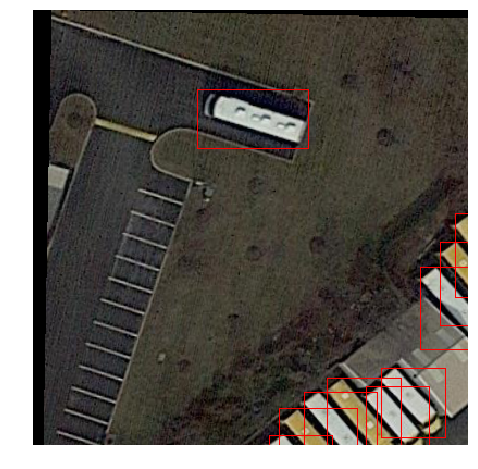

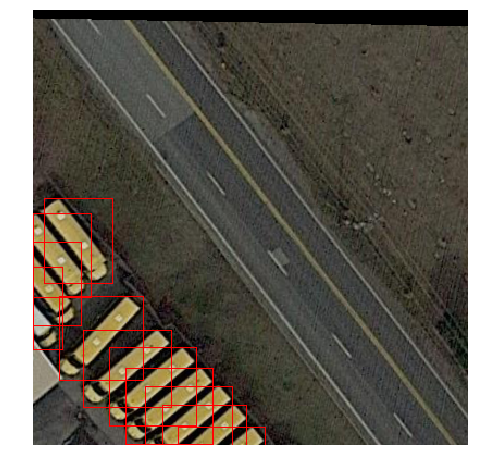

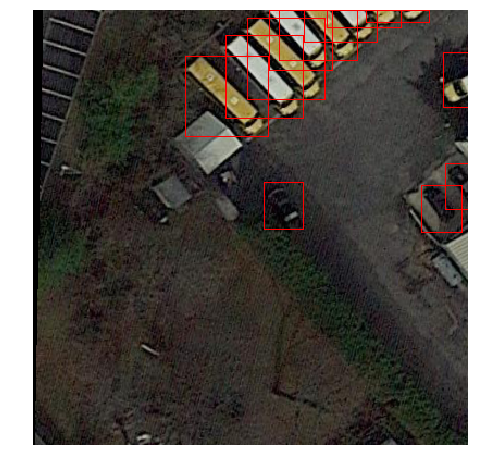

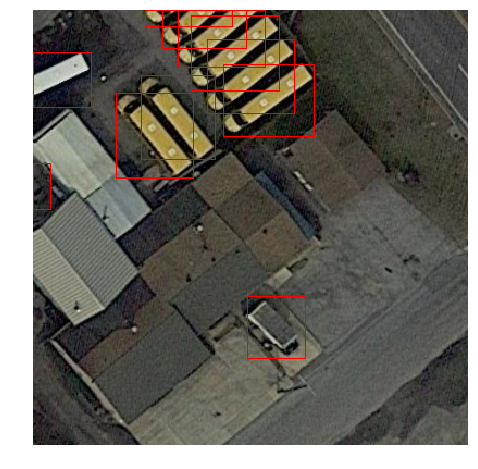

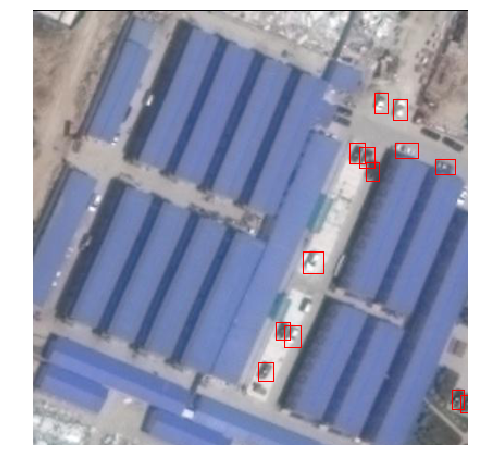

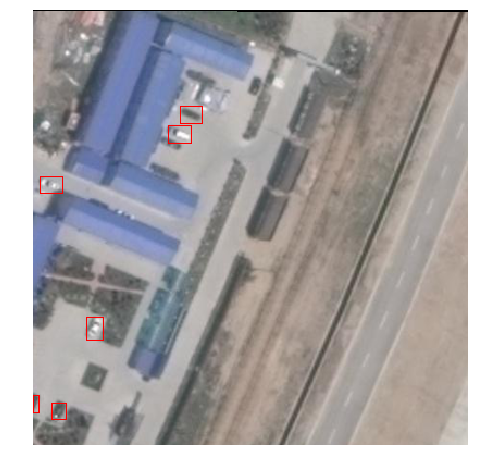

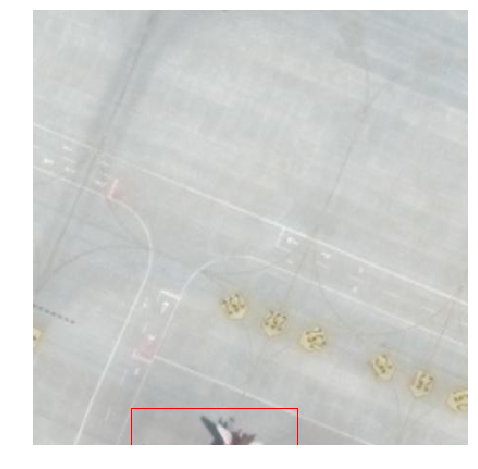

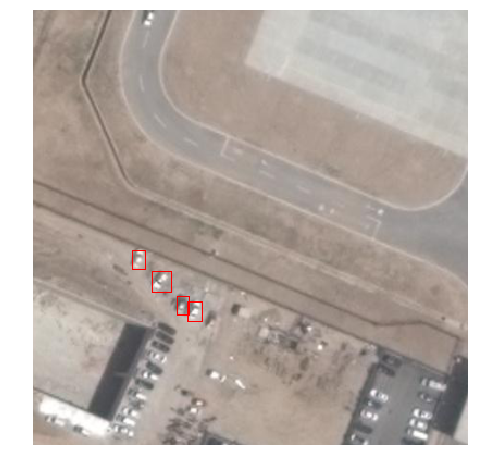

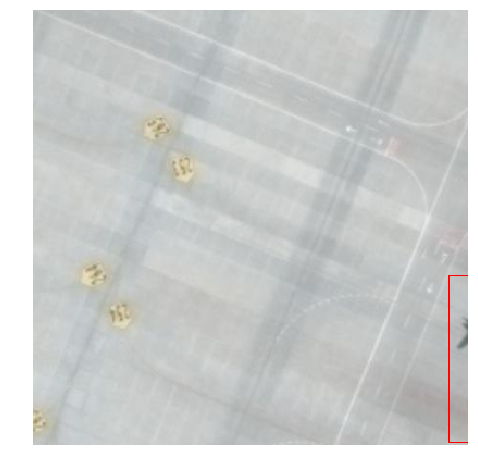

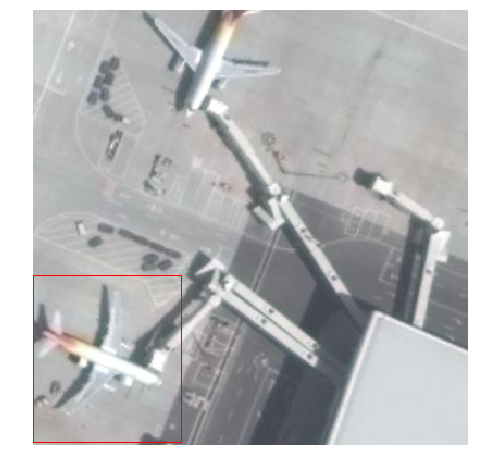

In [7]:
# Plotting PIL images as a matplotlib image screws up some of the bounding boxes for some reason;
# I assume it's a resize issue. Remove `return_image` or set it to `False` to pop-up a window with the image
for img in ds:
    plt.figure(figsize=(8,8))
    im = img.show(labels='all', return_image=True)
    plt.imshow(np.asarray(im))
    plt.axis('off')
    